In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os
import logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger('tensorflow').setLevel(logging.FATAL)
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# Editing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/CONSOLE_DIGITAL_MARKETING_APP_DATE_APPLE.csv', parse_dates=['DATE'], dayfirst=True)
df.head()

,DATE,C_COMPILER,C_TUTORIAL,CSHARP_COMPILER,CSHARP_TUTORIAL,CPLUSPLUS_COMPILER,CPLUSPLUS_TUTORIAL,CALCULATORPLUS,CALENDARPLUS,COMPILERPLUS,CSS_TUTORIAL,DART_COMPILER,DART_TUTORIAL,GO_COMPILER,GO_TUTORIAL,HTML_TUTORIAL,JAVA_COMPILER,JAVA_TUTORIAL,JAVASCRIPT_COMPILER,JAVASCRIPT_TUTORIAL,KOTLIN_COMPILER,KOTLIN_TUTORIAL,MOTIVATIONPLUS,NOTESPLUS,PHP_COMPILER,PHP_TUTORIAL,PYTHON_COMPILER,PYTHON_TUTORIAL,RUBY_COMPILER,RUBY_TUTORIAL,SUCCESS_STORIES,SWIFT_COMPILER,SWIFT_TUTORIAL,TASKSPLUS,TIMEPLUS,TRAVEL_DIARIES,XML_TUTORIAL
0,2021-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-03-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Display data in the form of graph

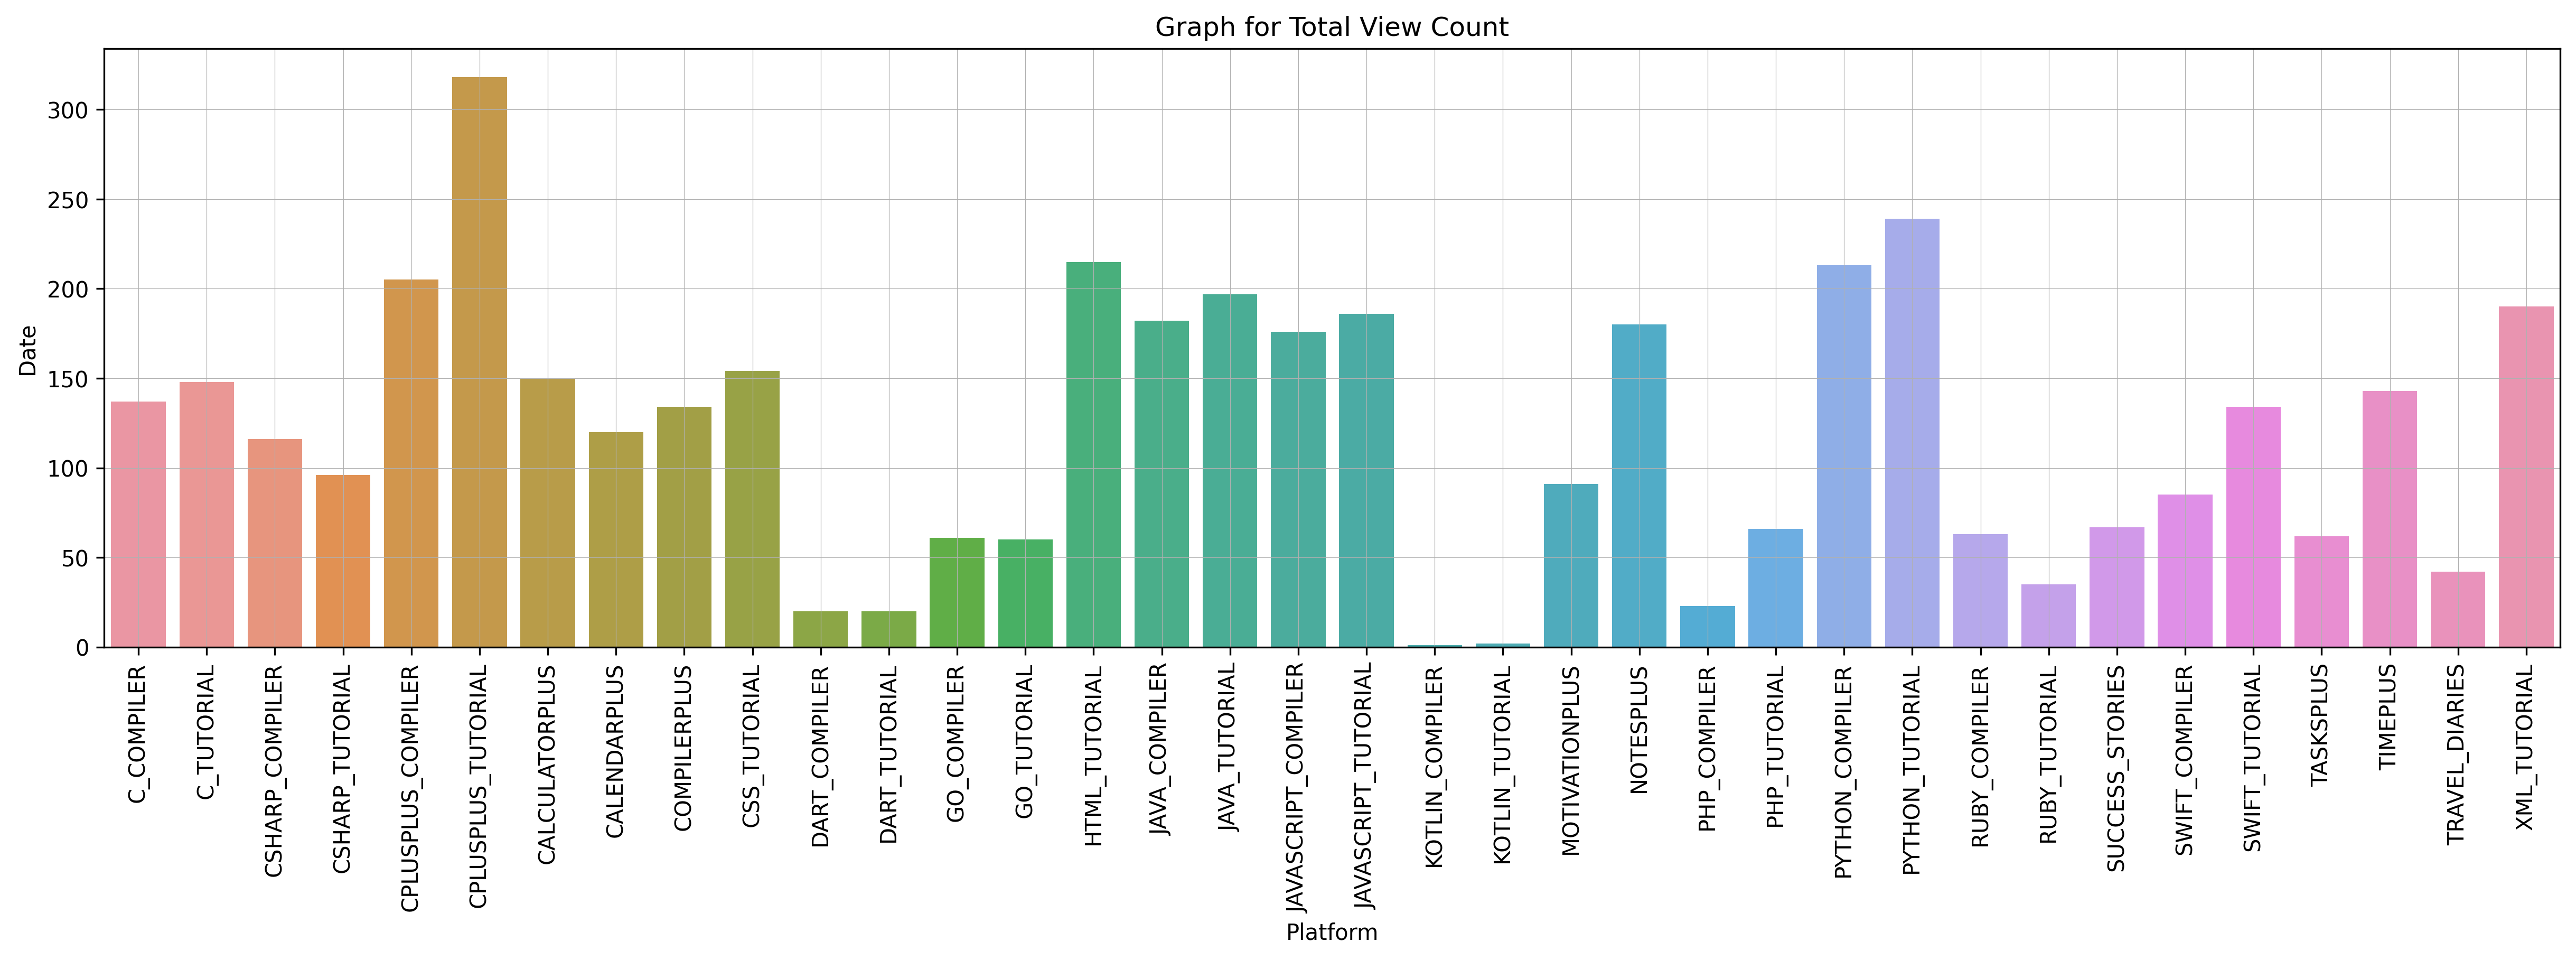

In [4]:
x = []
y = []
for slug in df:
    x.append(slug)
x = x[1:]
for slug in x:
    y.append(int(sum(df[slug])))

plt.rcParams.update({'figure.figsize': (20, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.barplot(x=x, y=y)
plt.xlabel('Platform')
plt.ylabel('Date')
plt.title('Graph for Total View Count')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

# Converting DATE to index
# Choosing the platform to view data analysis
- If the user want to check the data analysis for a specific platform, then change the "platform" variable to that specific platform. For example, platform = 'CPLUSPLUS'

In [5]:
#for platform in df.columns[1:]:
#    print(platform)
platform = 'C_COMPILER'
data=pd.DataFrame({'DATE': df['DATE'], '{}'.format(platform): df['{}'.format(platform)]})
data.index = data['DATE']
data = data.drop(['DATE'], axis=1)
data.head()

,C_COMPILER
DATE,
2021-03-08,0
2021-03-09,0
2021-03-10,0
2021-03-11,0
2021-03-13,0


In [6]:
future_df = pd.read_csv('drive/MyDrive/CONSOLE_DIGITAL_MARKETING_APP_DATE_APPLE - FUTURE.csv', parse_dates=['DATE'], dayfirst=True)
future_data=pd.DataFrame({'DATE': future_df['DATE'], '{}'.format(platform): future_df['{}'.format(platform)]})
future_data.index = future_data['DATE']
future_data = future_data.drop(['DATE'], axis=1)
future_data = future_data.head(120)
future_data.head()

,C_COMPILER
DATE,
2022-03-08,0
2022-03-09,0
2022-03-10,0
2022-03-11,0
2022-03-13,0


## Plotting the daily View Count for the platform

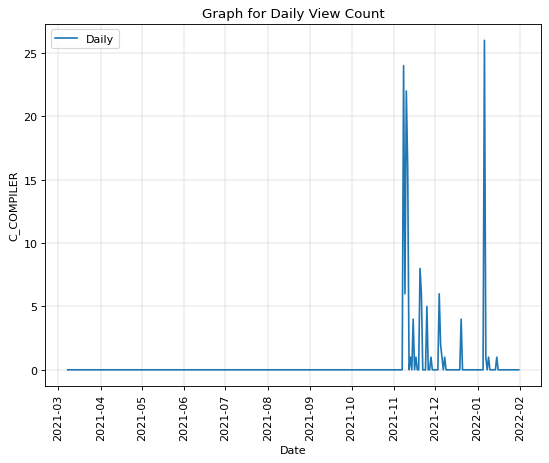

In [7]:
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi':80})
fig, ax = plt.subplots()
sns.lineplot(data=data, x='DATE', y=data.columns[0], label ='Daily')
plt.xlabel('Date')
plt.ylabel(data.columns[0])
plt.title('Graph for Daily View Count')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [8]:
def df_to_X_y(df, window_size=4):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 4
X, y = df_to_X_y(data, WINDOW_SIZE)
X.shape, y.shape

((316, 4, 1, 1), (316, 1))

In [10]:
X_train, y_train = X[:289], y[:289]
X_test, y_test = X[289:], y[289:]
X_predict, y_predict = X[:120], y[:120]
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_predict.shape, y_predict.shape

((289, 4, 1, 1), (289, 1), (27, 4, 1, 1), (27, 1), (120, 4, 1, 1), (120, 1))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((4, 1)))
model.add(GRU(1000))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1000)              3009000   
                                                                 
 dense (Dense)               (None, 8)                 8008      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,017,017
Trainable params: 3,017,017
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp = ModelCheckpoint('model/', save_best_only=True, verbose=0)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[cp], verbose=1)

Epoch 1/100
10/10 [==============================] - 9s 654ms/step - loss: 5.3244 - root_mean_squared_error: 2.3075 - val_loss: 25.1093 - val_root_mean_squared_error: 5.0109
Epoch 2/100
10/10 [==============================] - 1s 115ms/step - loss: 5.1340 - root_mean_squared_error: 2.2658 - val_loss: 25.1421 - val_root_mean_squared_error: 5.0142
Epoch 3/100
10/10 [==============================] - 1s 115ms/step - loss: 4.9387 - root_mean_squared_error: 2.2223 - val_loss: 25.2633 - val_root_mean_squared_error: 5.0263
Epoch 4/100
10/10 [==============================] - 1s 115ms/step - loss: 4.7923 - root_mean_squared_error: 2.1891 - val_loss: 25.4084 - val_root_mean_squared_error: 5.0407
Epoch 5/100
10/10 [==============================] - 1s 122ms/step - loss: 4.6789 - root_mean_squared_error: 2.1631 - val_loss: 25.5476 - val_root_mean_squared_error: 5.0545
Epoch 6/100
10/10 [==============================] - 1s 116ms/step - loss: 4.6106 - root_mean_squared_error: 2.1472 - val_loss: 25

In [14]:
from tensorflow.keras.models import load_model
model = load_model('model/')

In [15]:
validations = model.predict(X_test).flatten()
predictions = model.predict(X_predict).flatten()
validated_result = pd.DataFrame({'Validated': validations, 'Original': y_test.flatten()})
predicted_result = pd.DataFrame({'Predicted': predictions, 'DATE': future_data.index[:120]})
validated_result.head()

,Validated,Original
0,0.016336,0
1,0.016336,0
2,0.016336,0
3,0.016336,0
4,0.016336,0


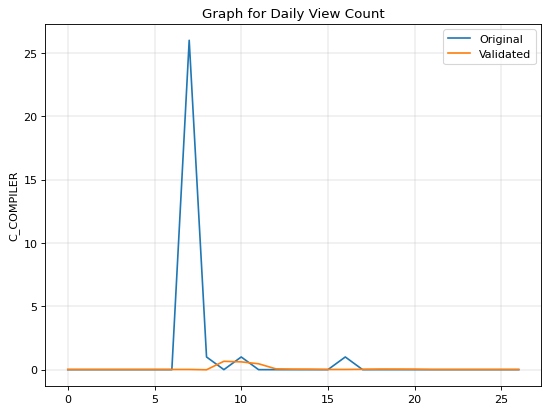

In [16]:
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi':80})
fig, ax = plt.subplots()
sns.lineplot(data=validated_result, x=validated_result.index, y='Original', label ='Original')
sns.lineplot(data=validated_result, x=validated_result.index, y='Validated', label ='Validated')
plt.ylabel(data.columns[0])
plt.title('Graph for Daily View Count')
plt.grid(linestyle='-', linewidth=0.3)

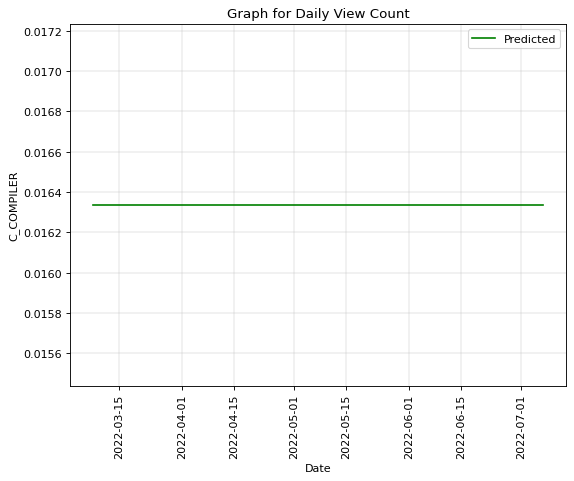

In [17]:
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi':80})
fig, ax = plt.subplots()
sns.lineplot(data=predicted_result, x='DATE', y='Predicted', label ='Predicted', color='Green')
plt.xlabel('Date')
plt.ylabel(data.columns[0])
plt.title('Graph for Daily View Count')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

## Validated and Predicted values for all the platforms

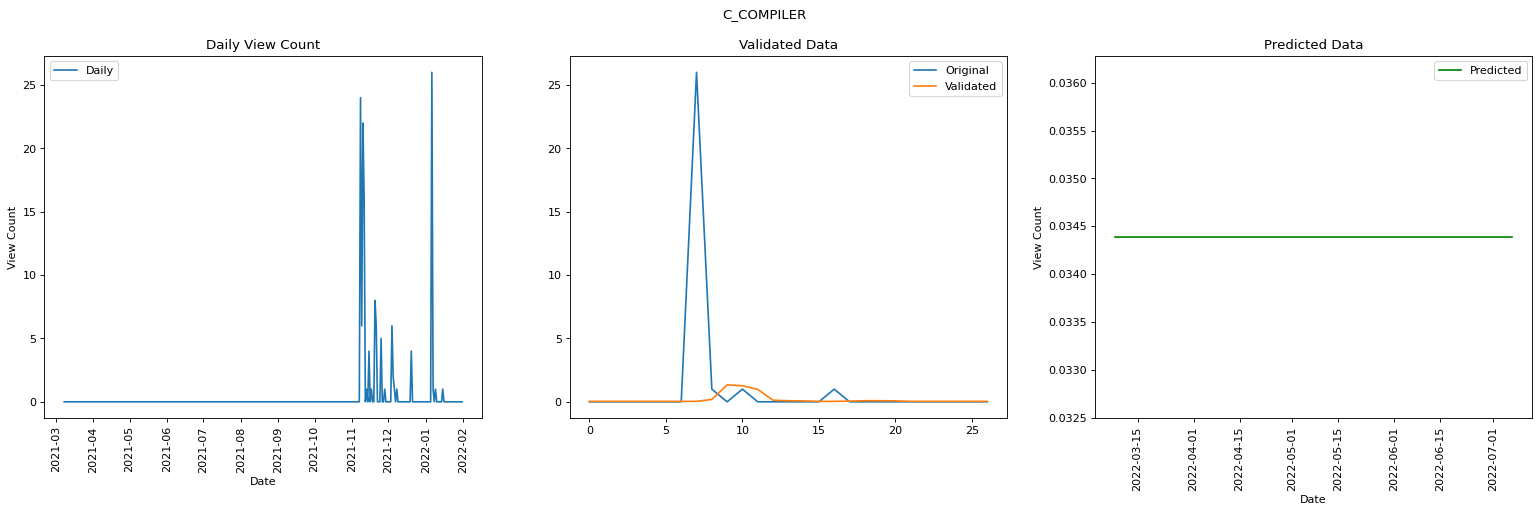

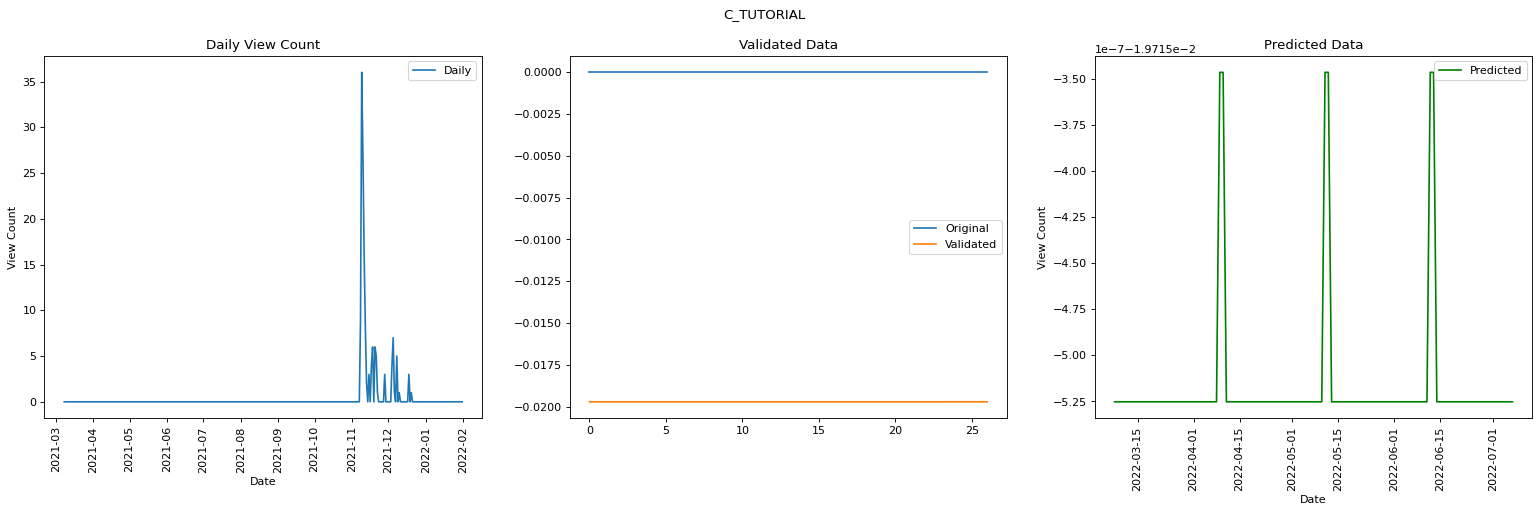

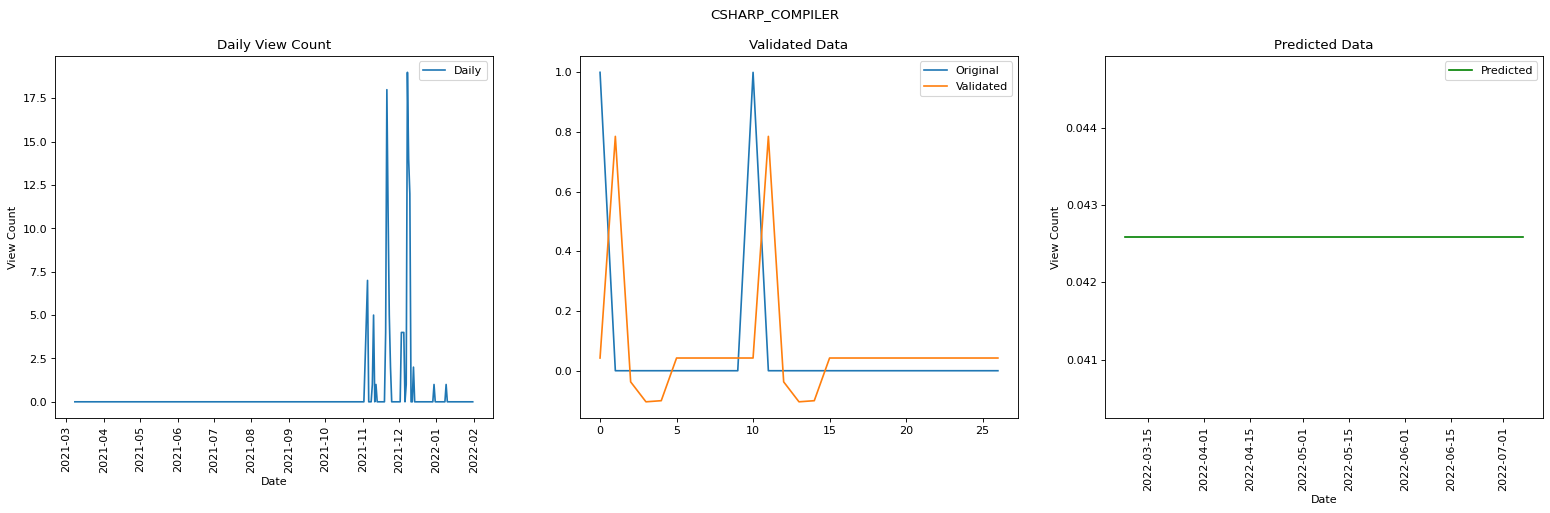

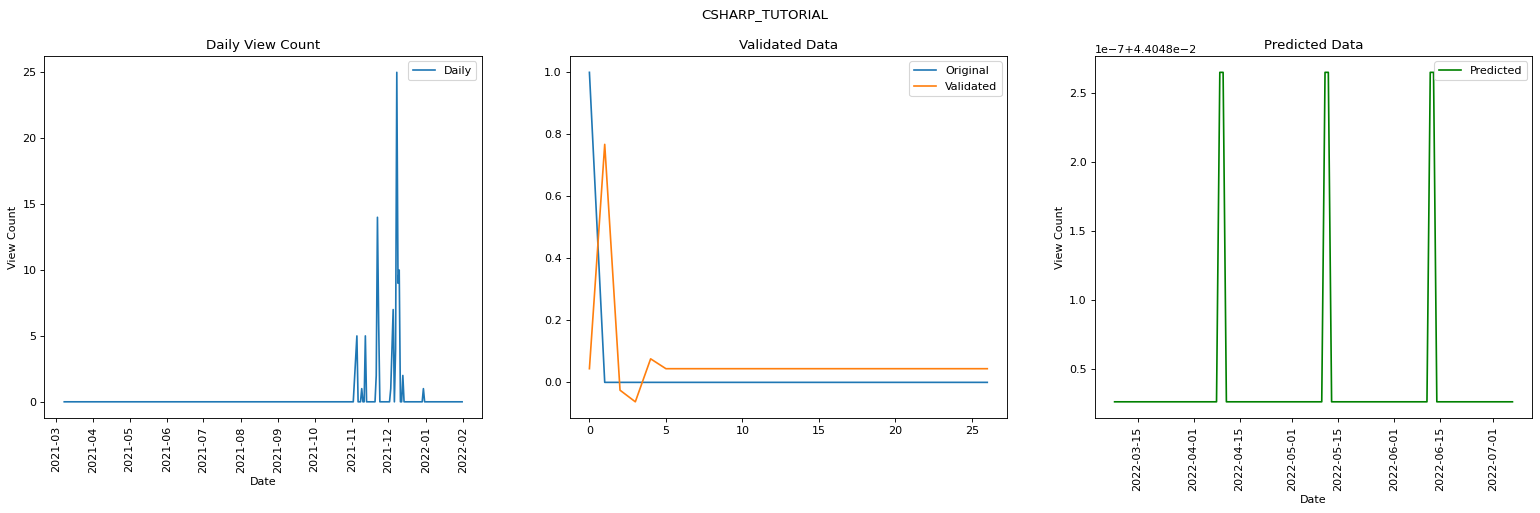

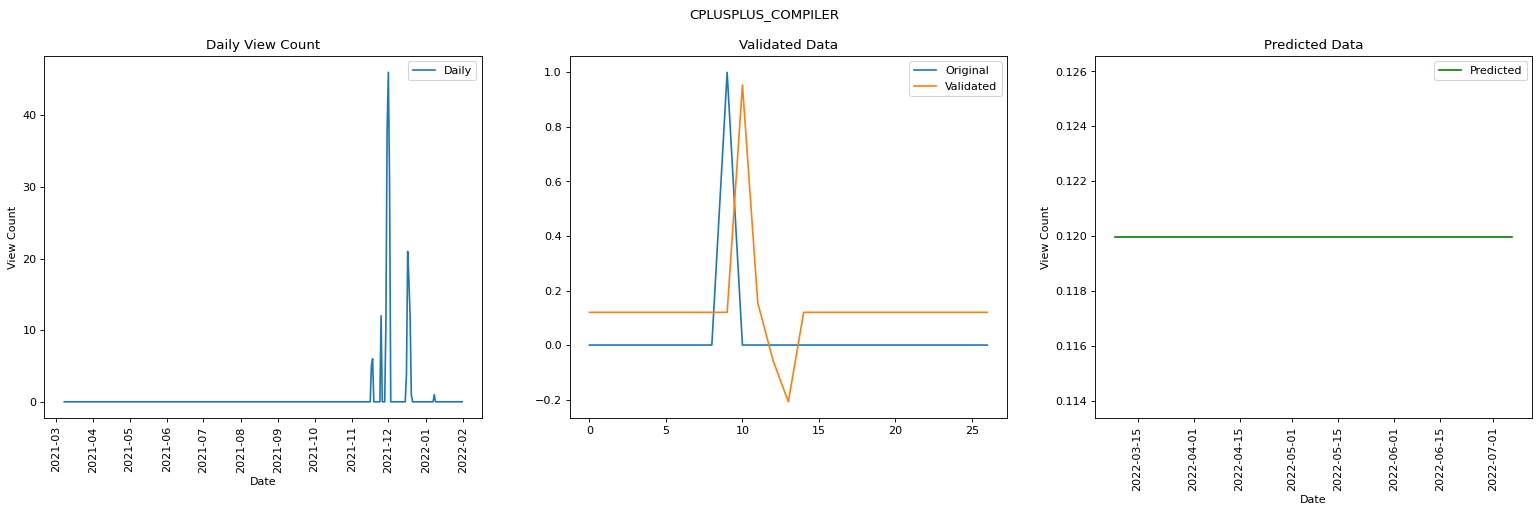

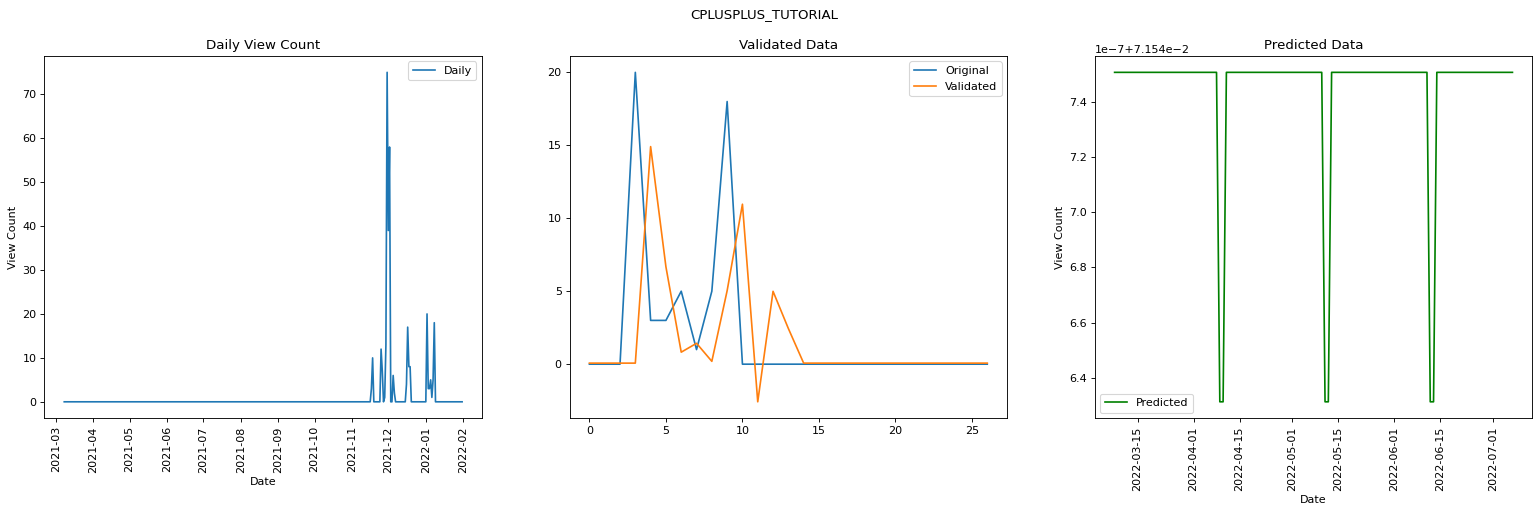

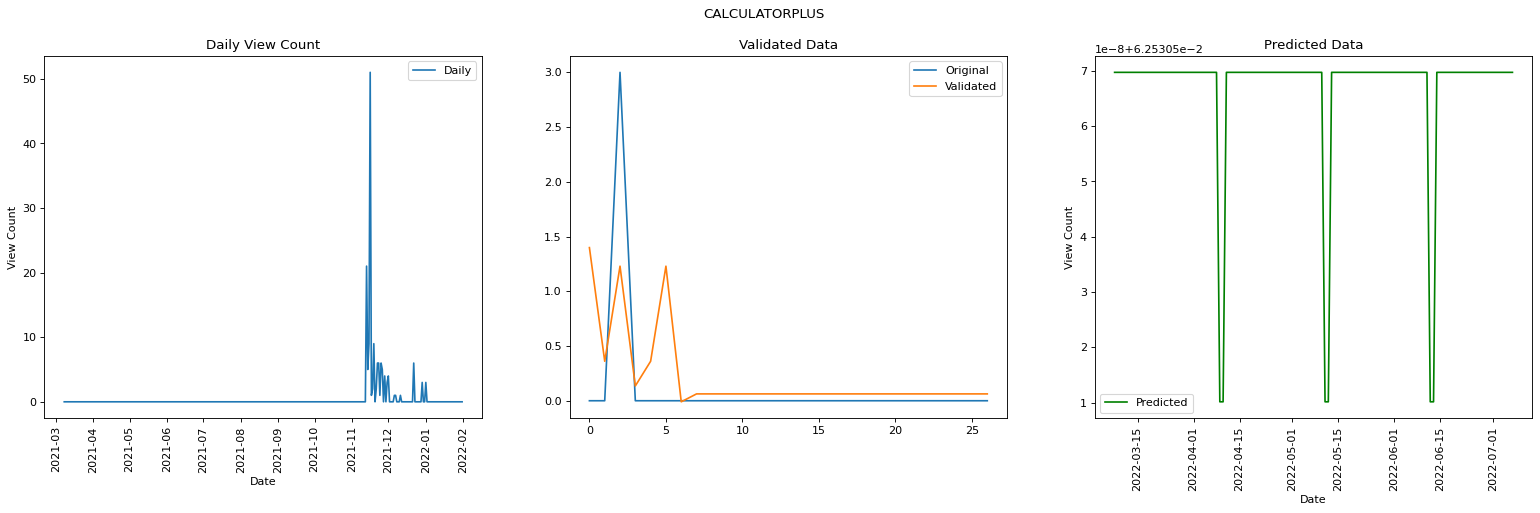

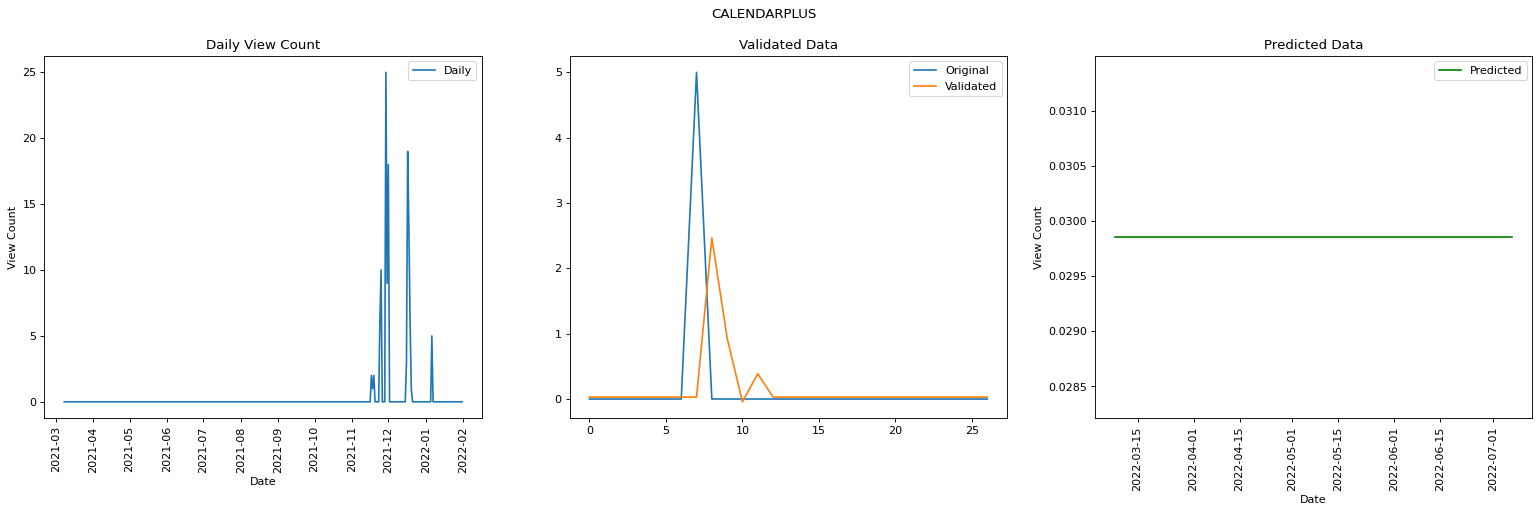

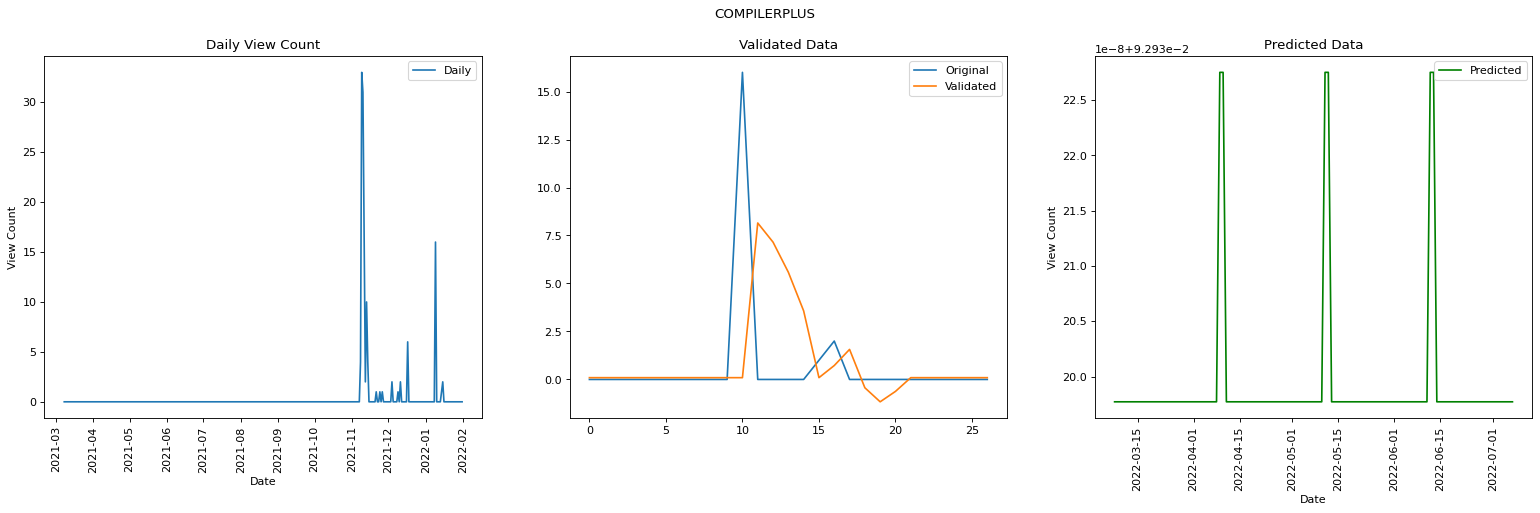

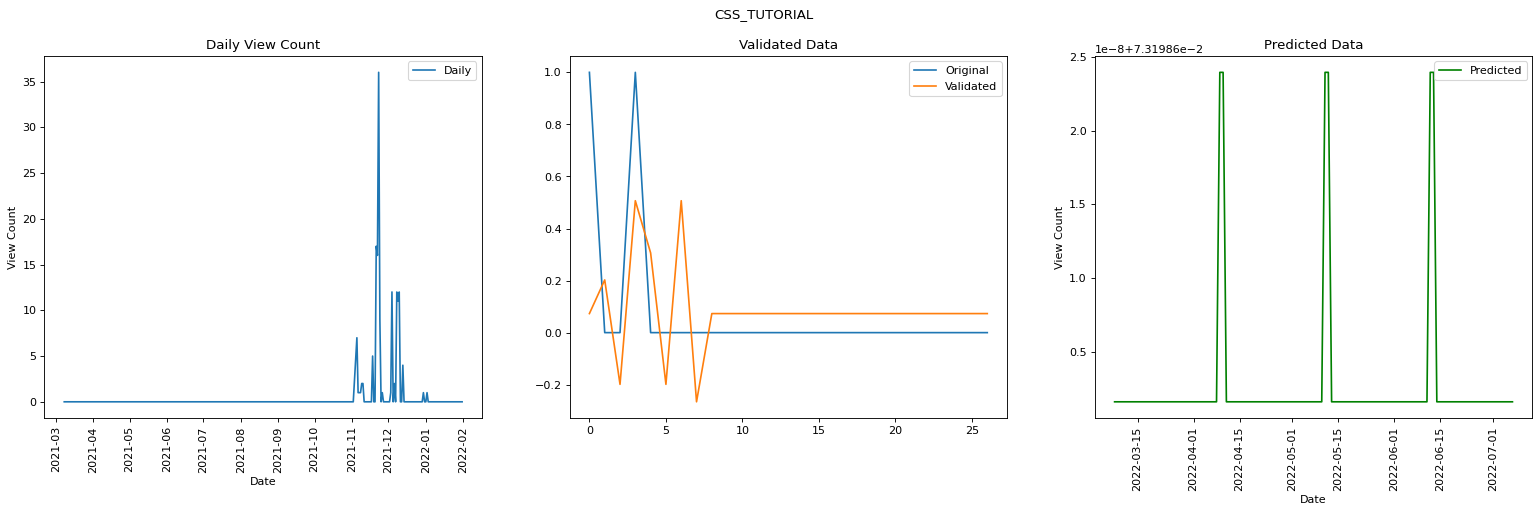

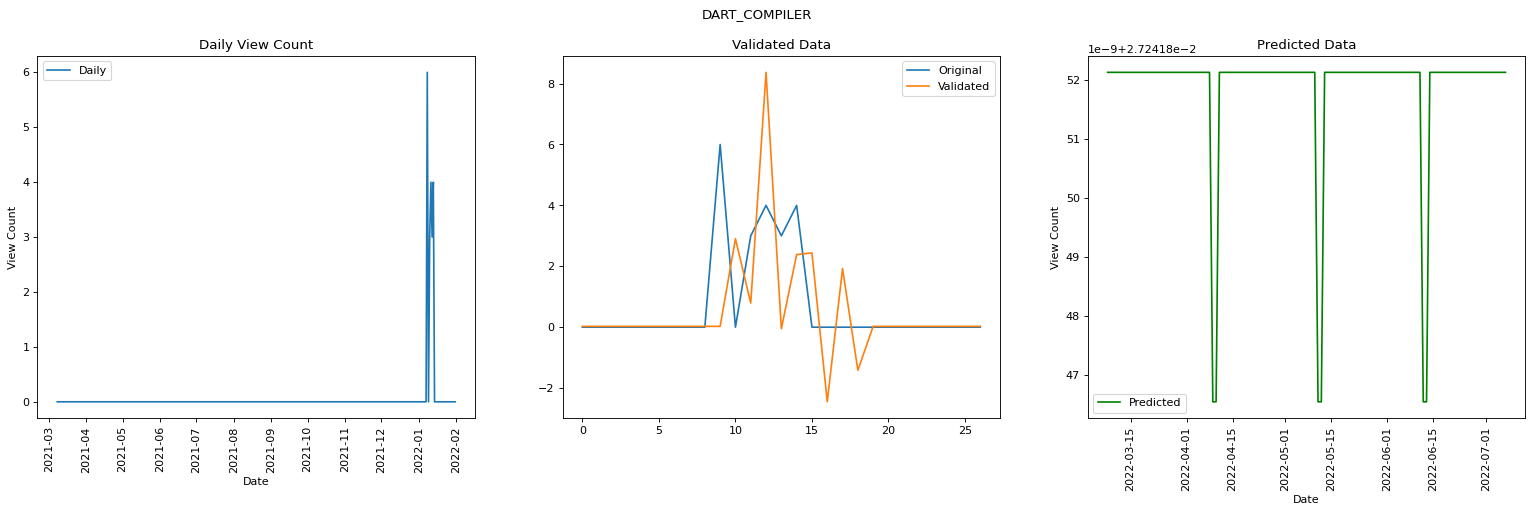

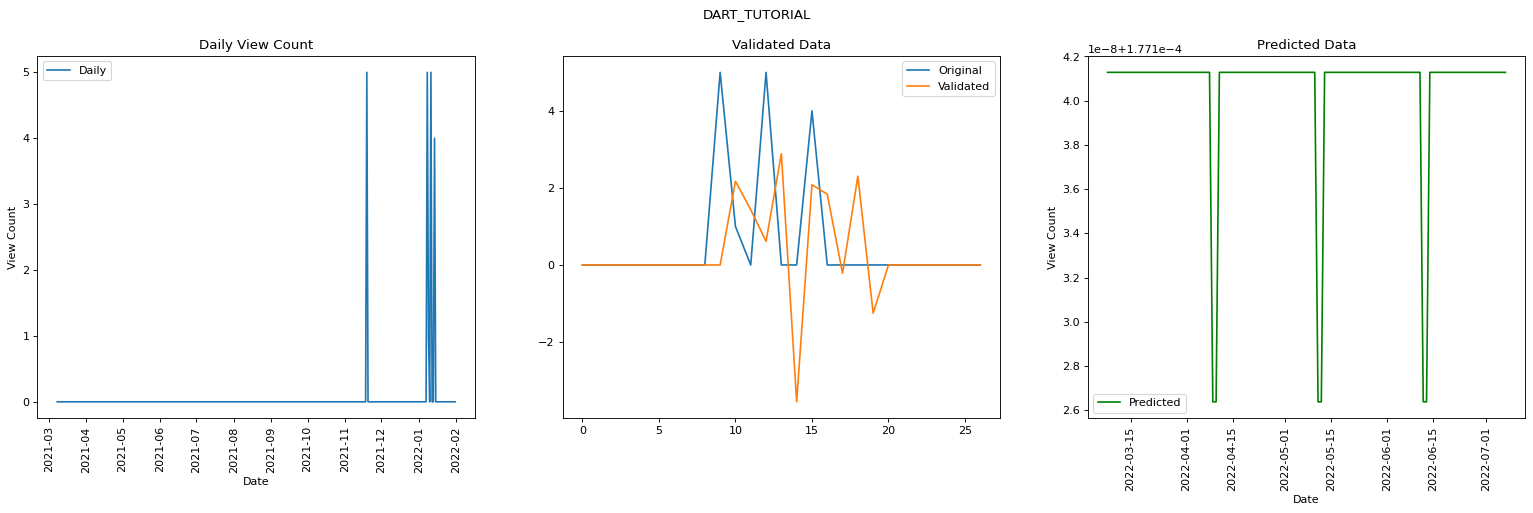

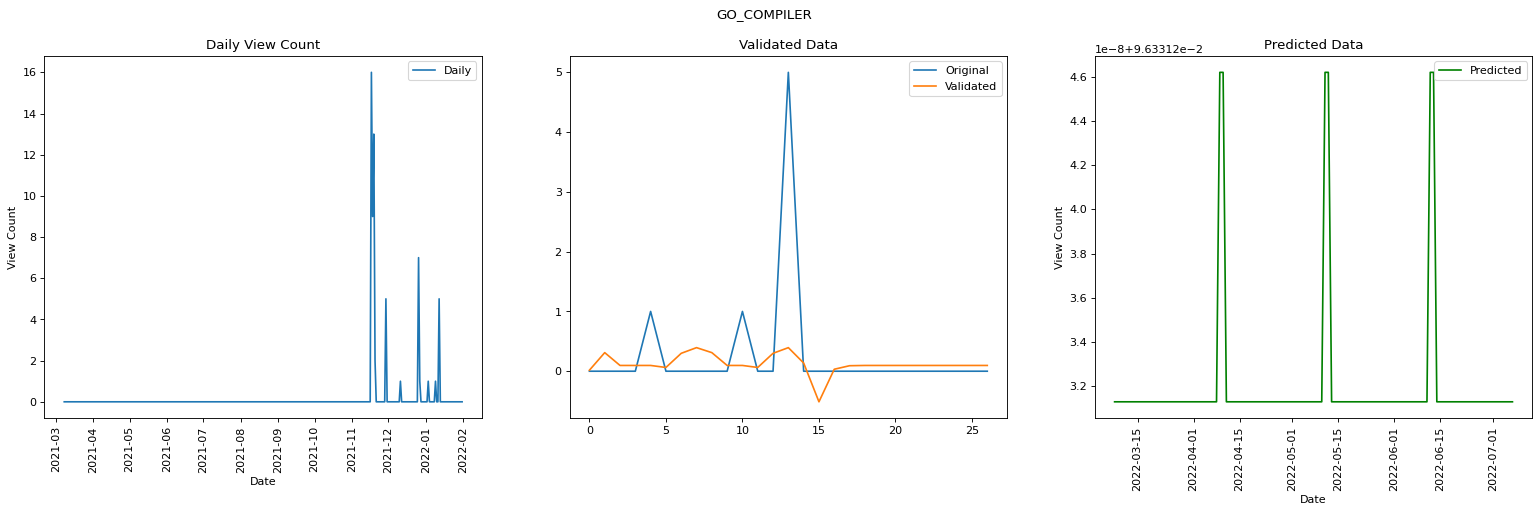

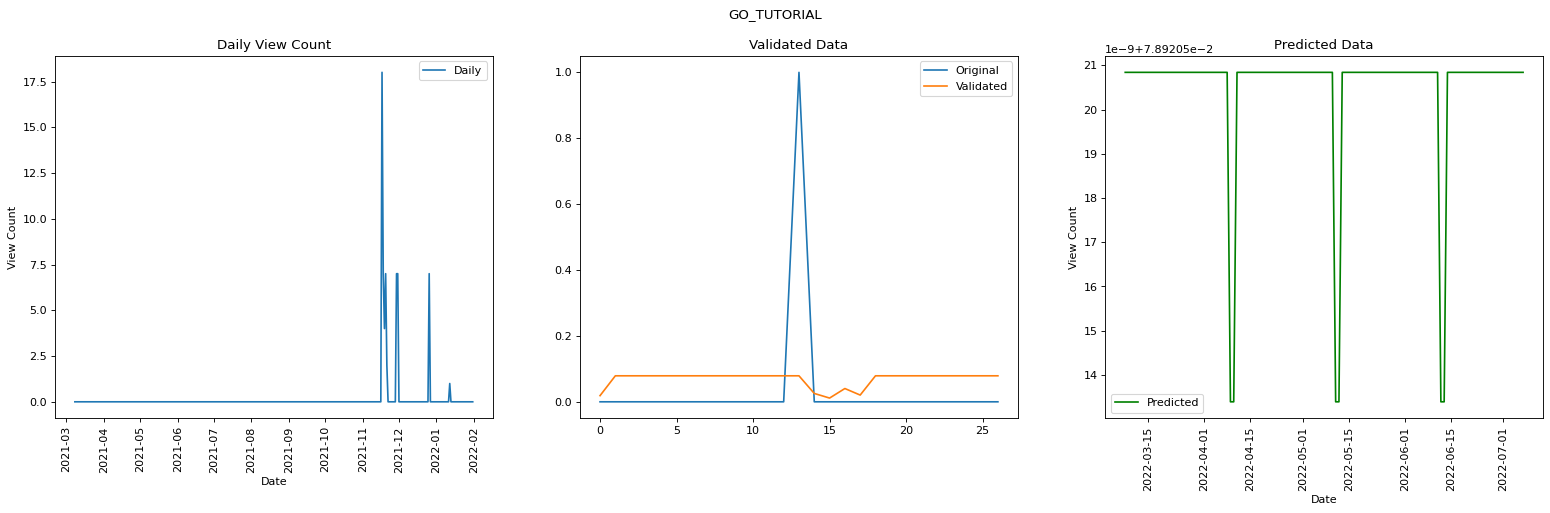

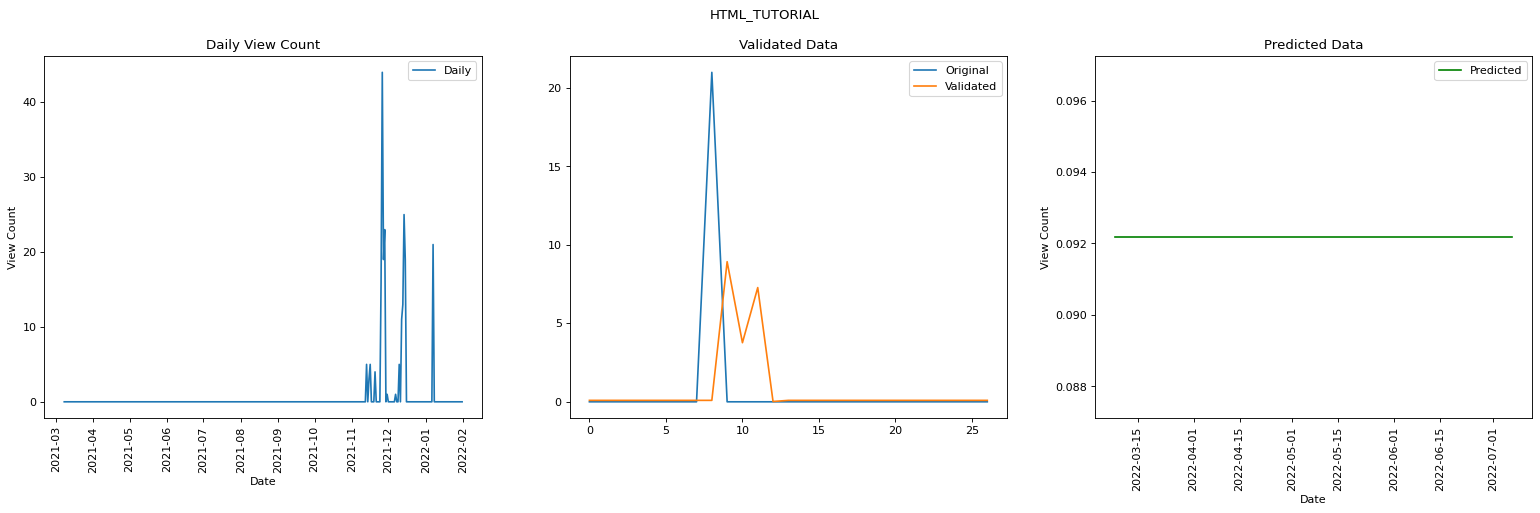

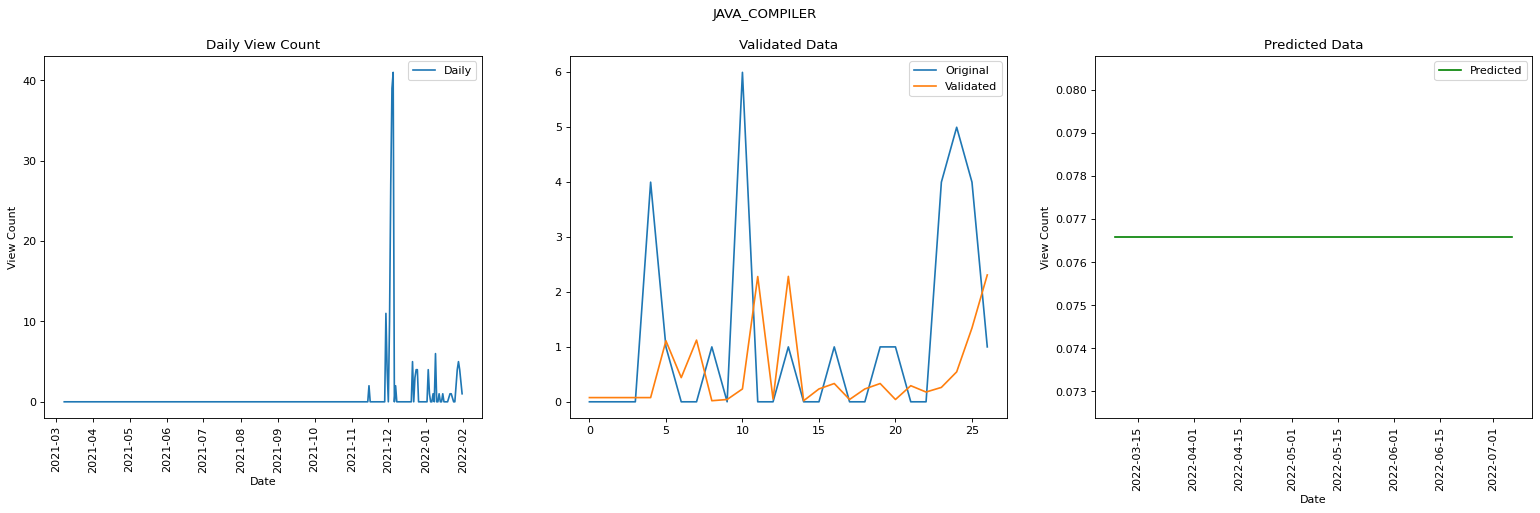

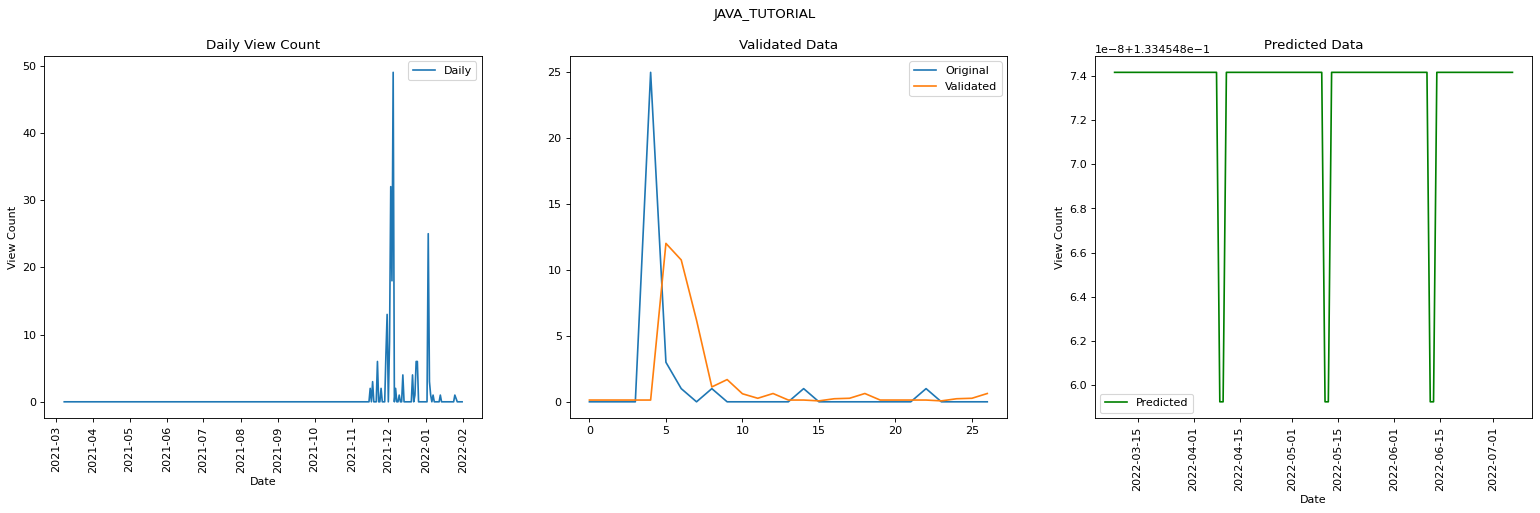

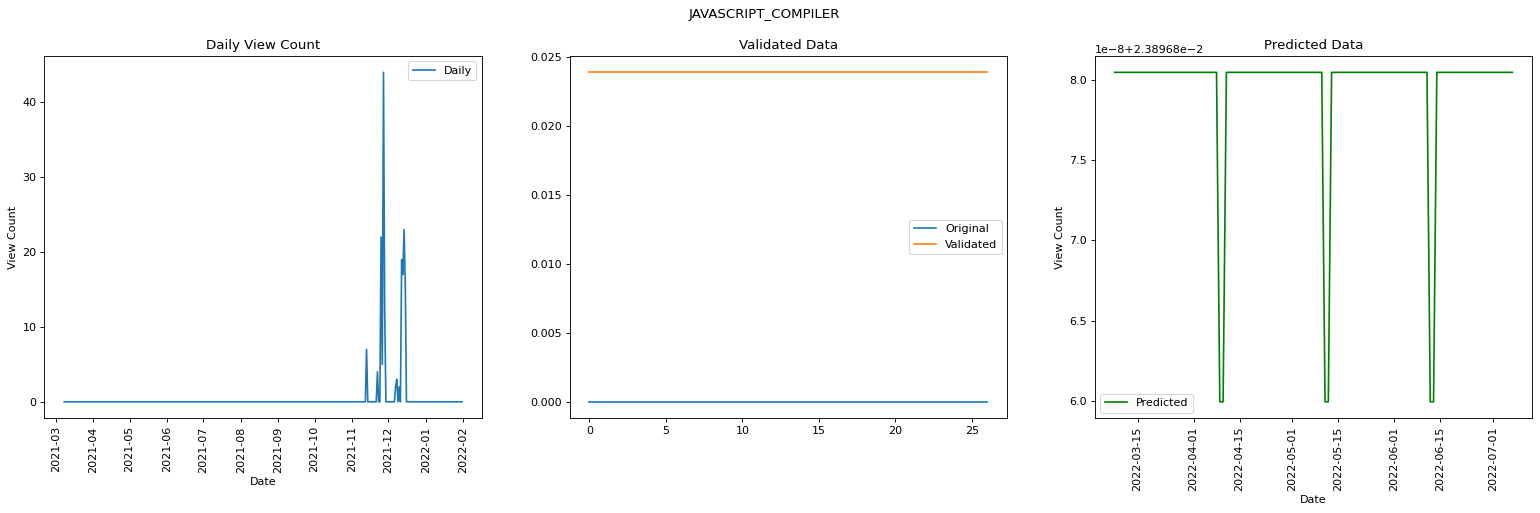

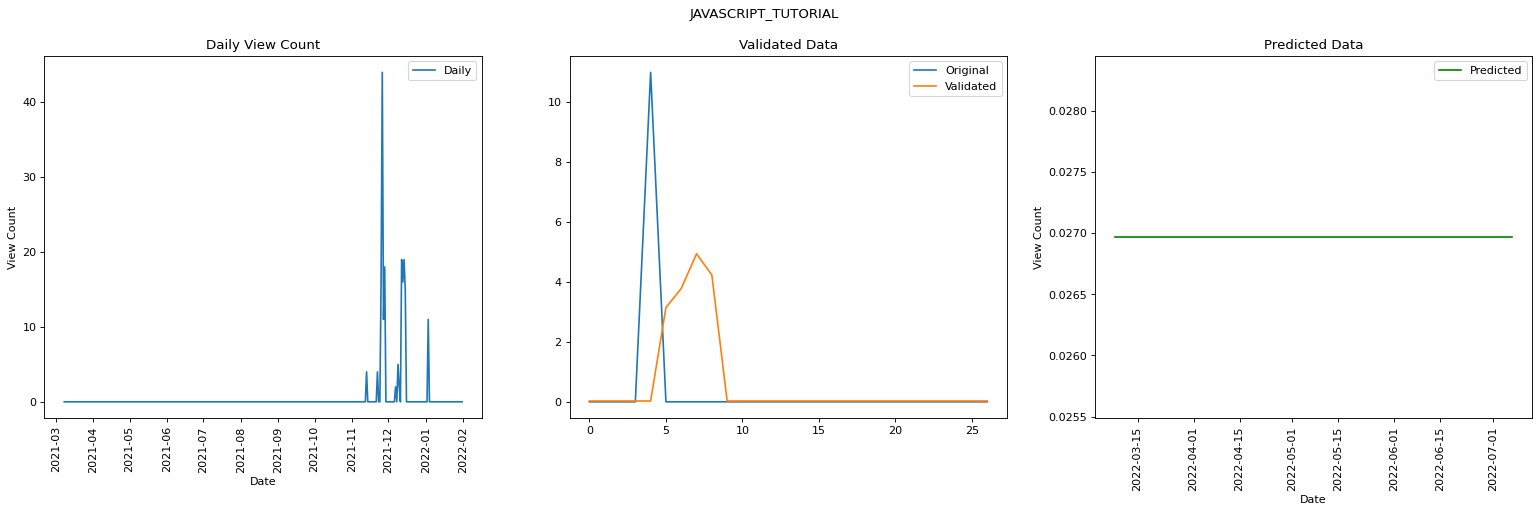

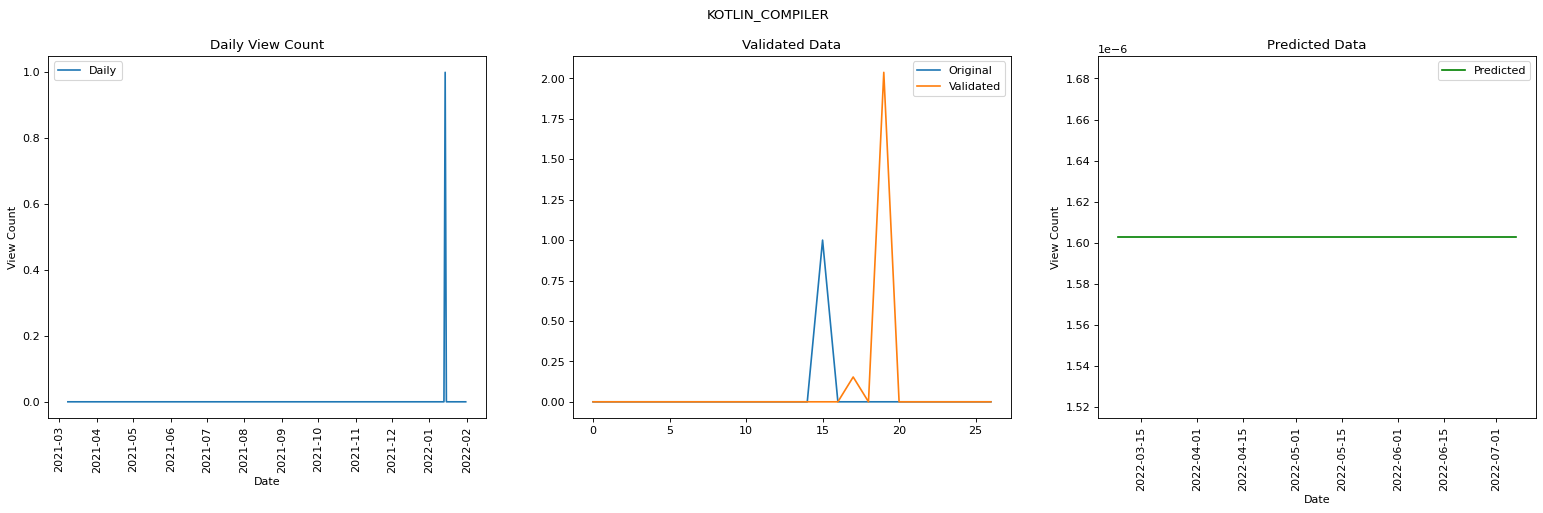

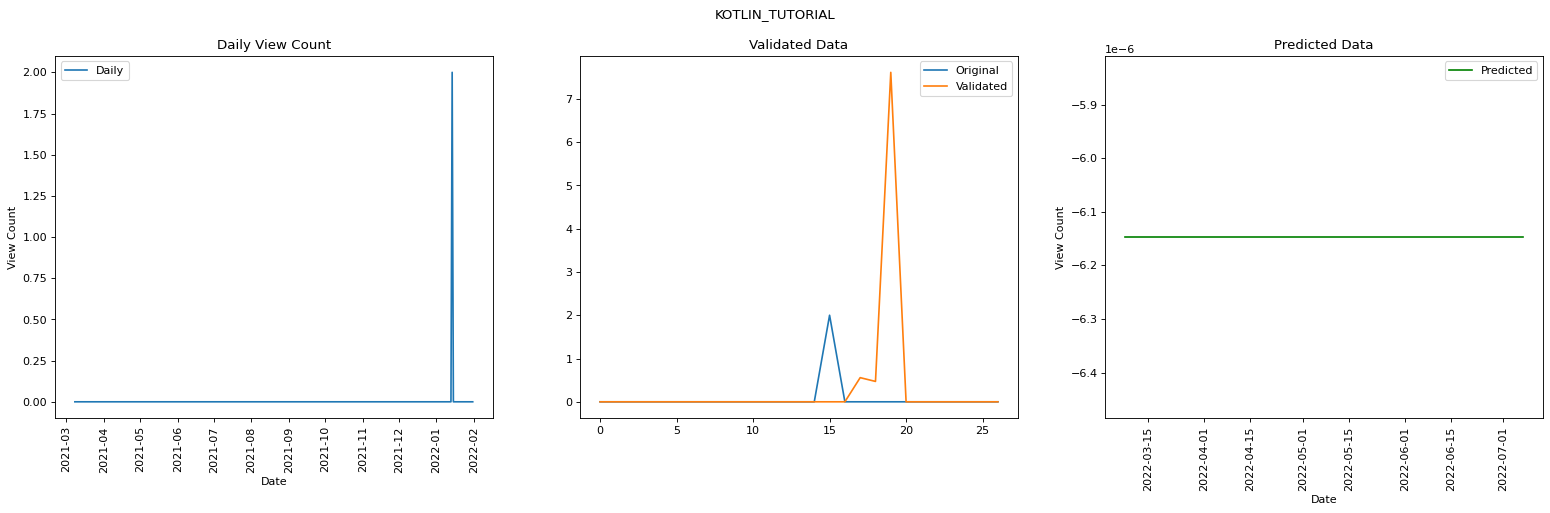

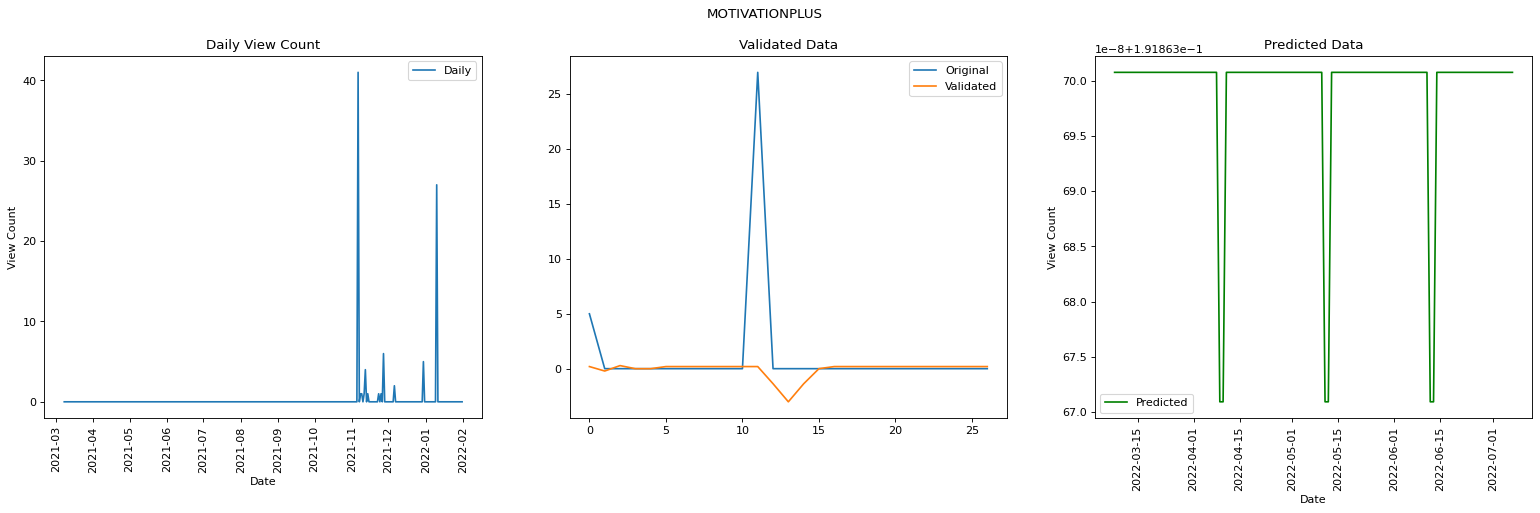

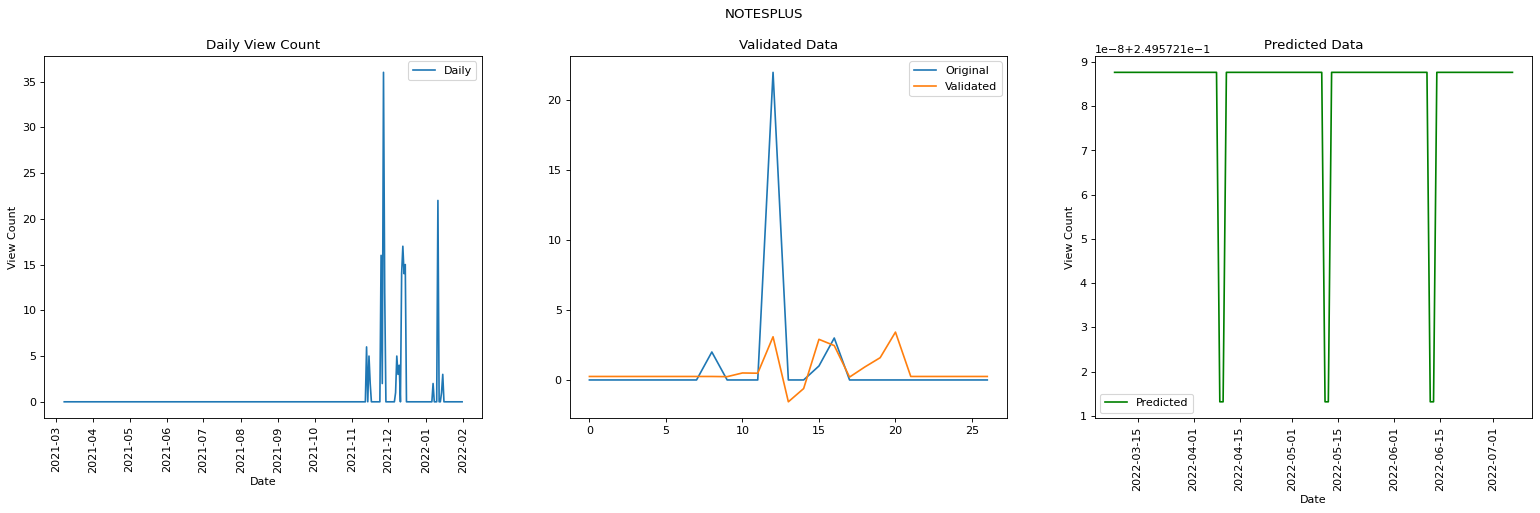

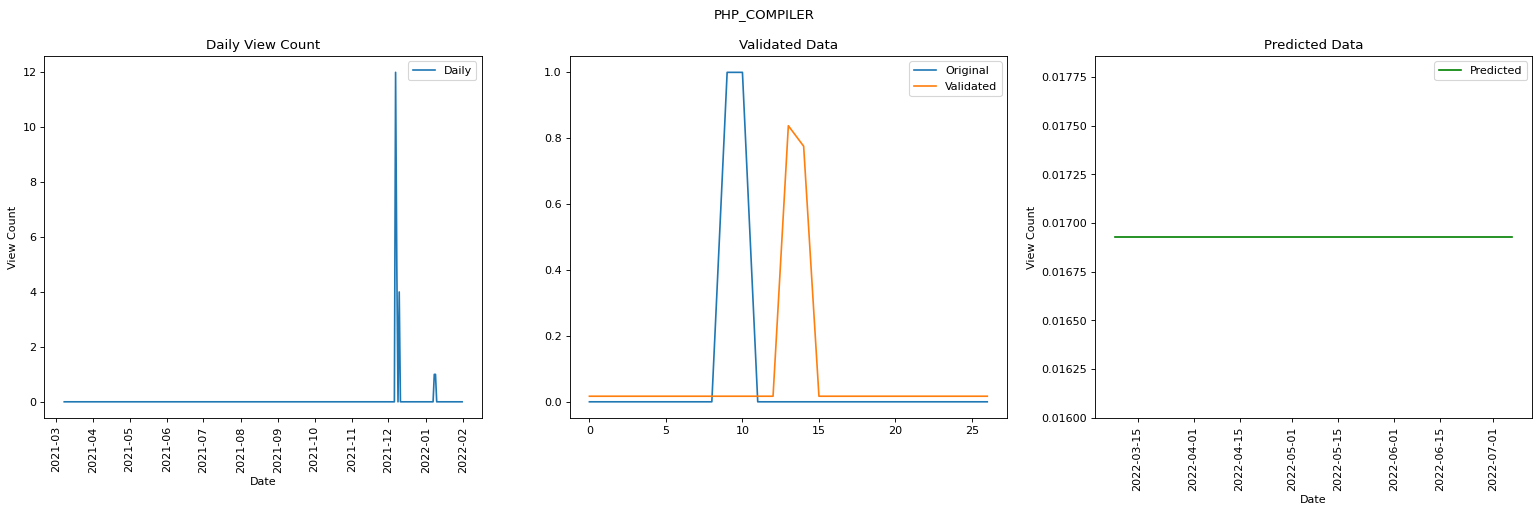

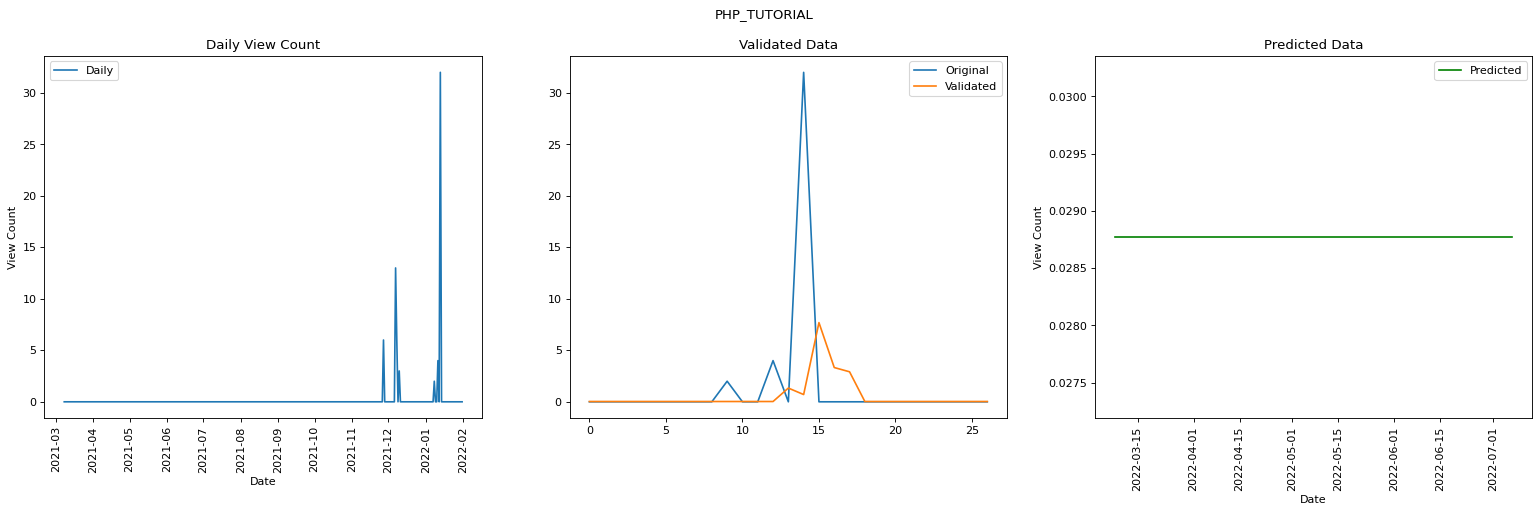

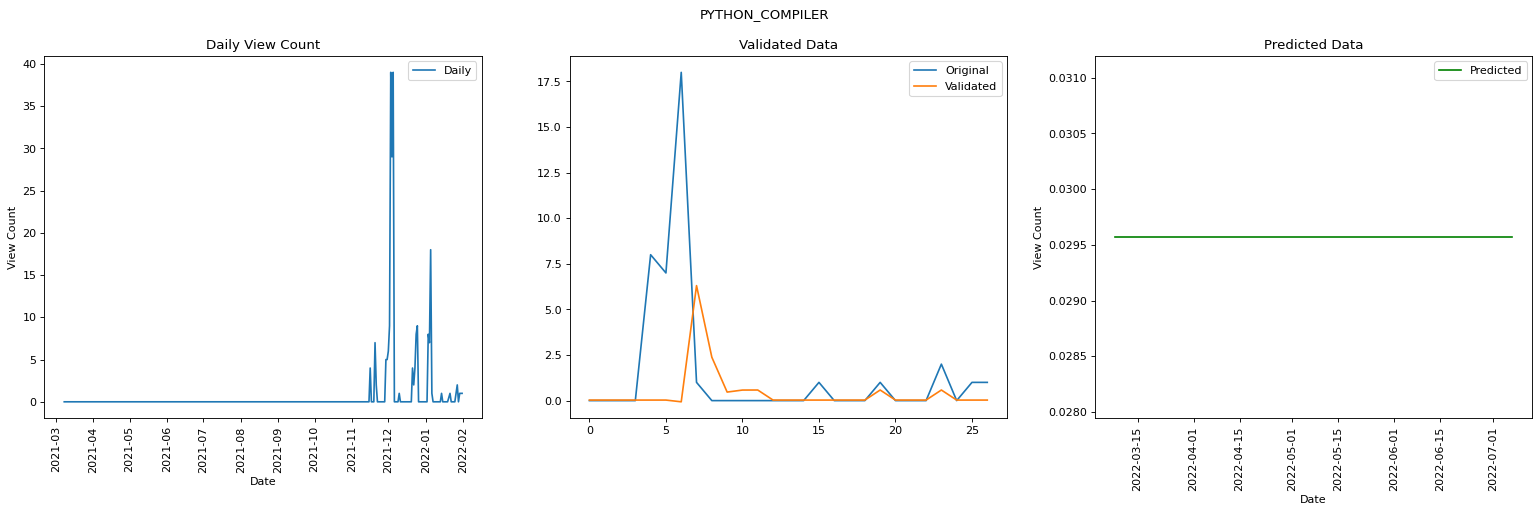

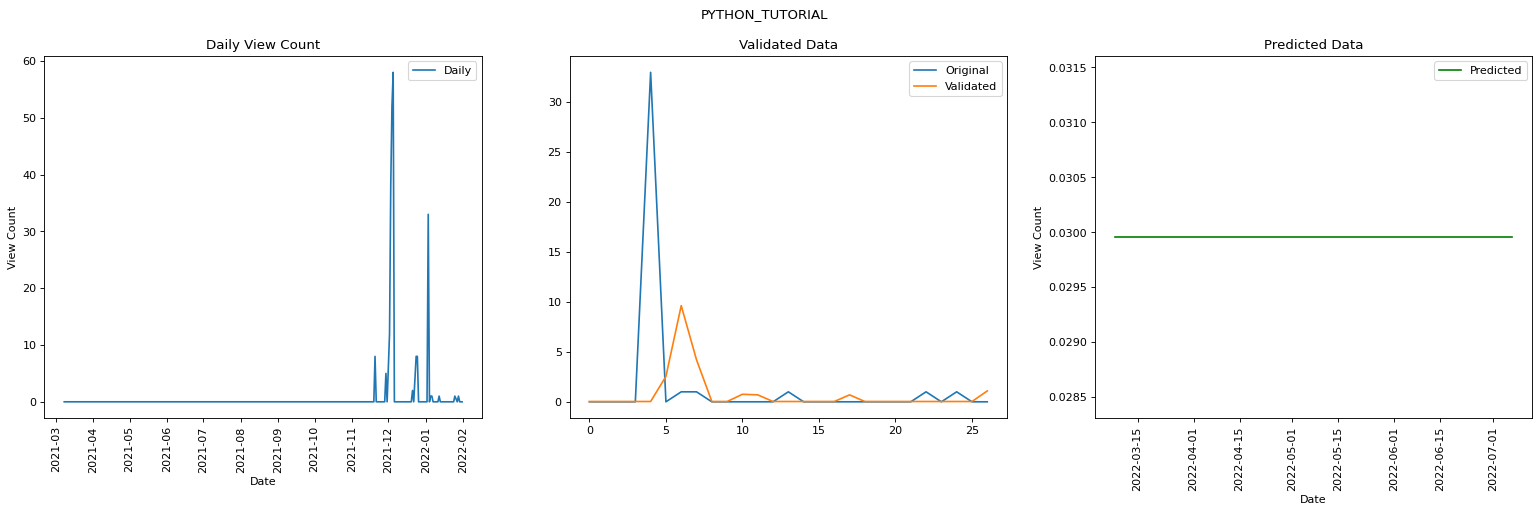

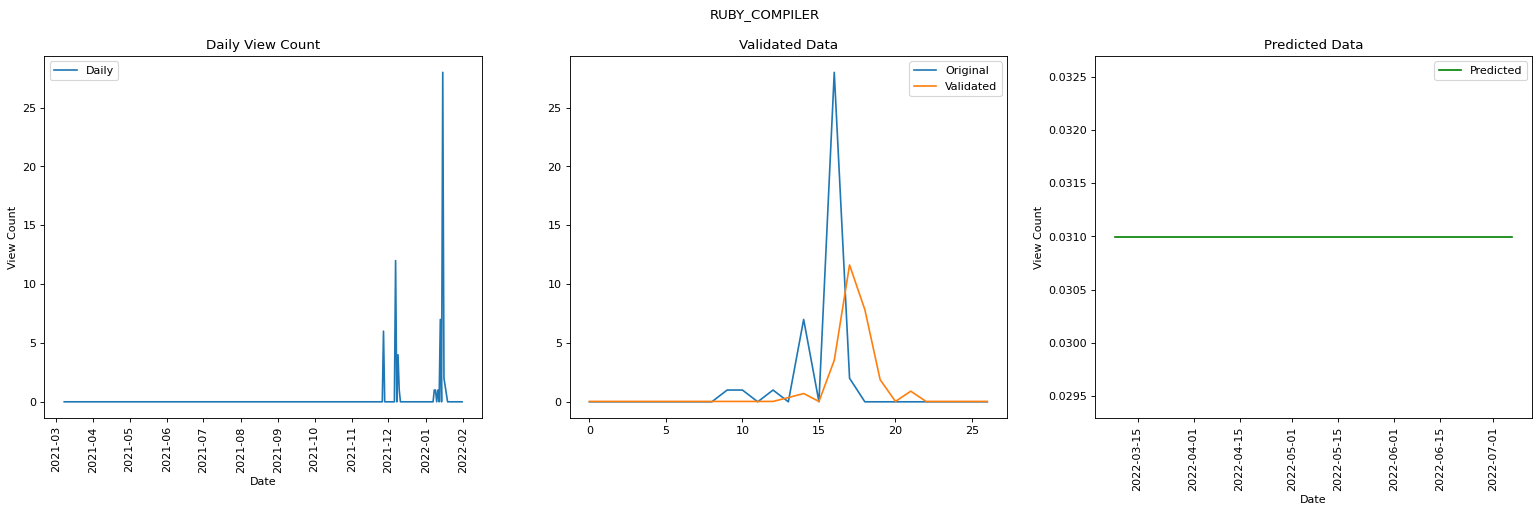

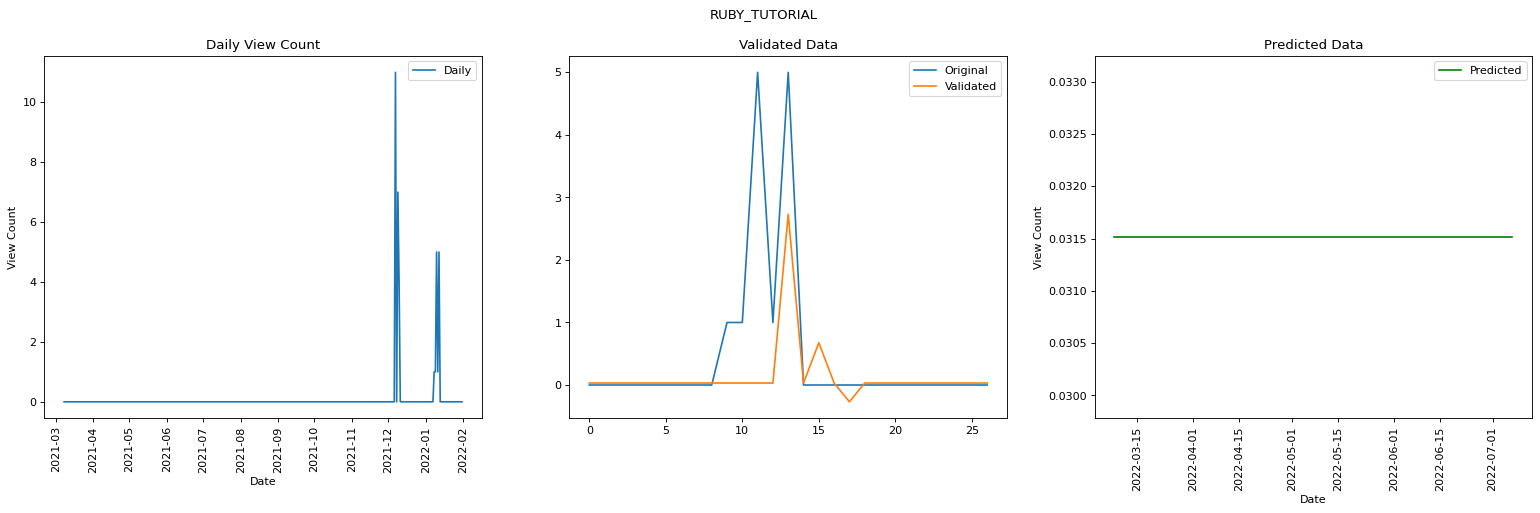

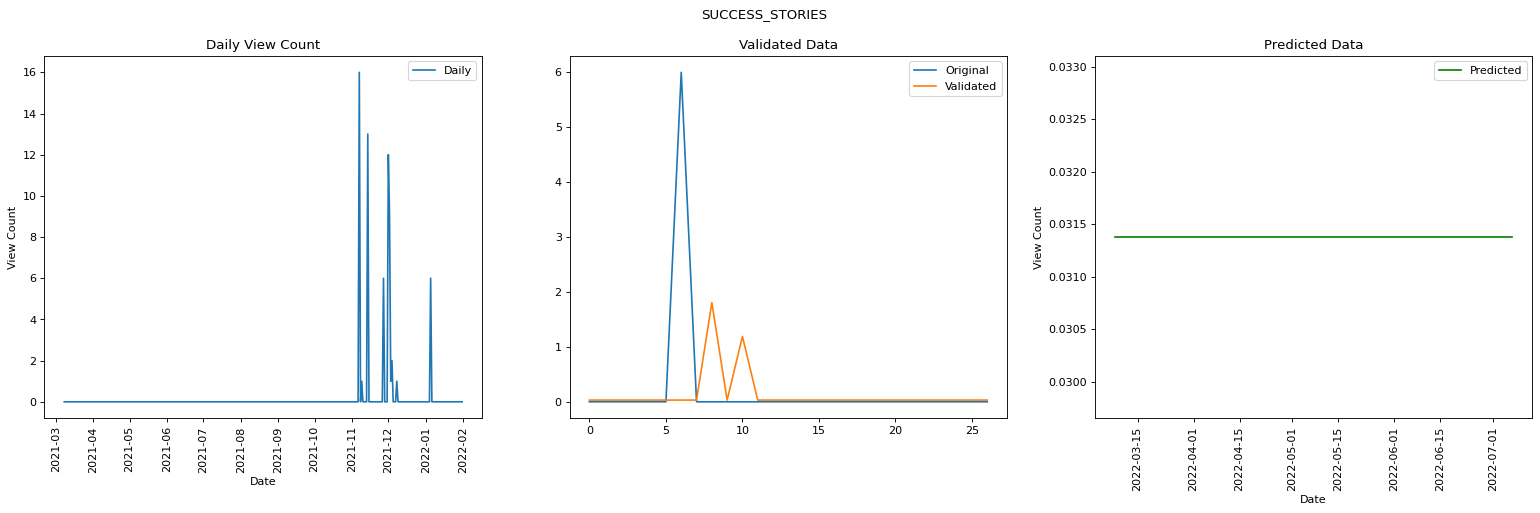

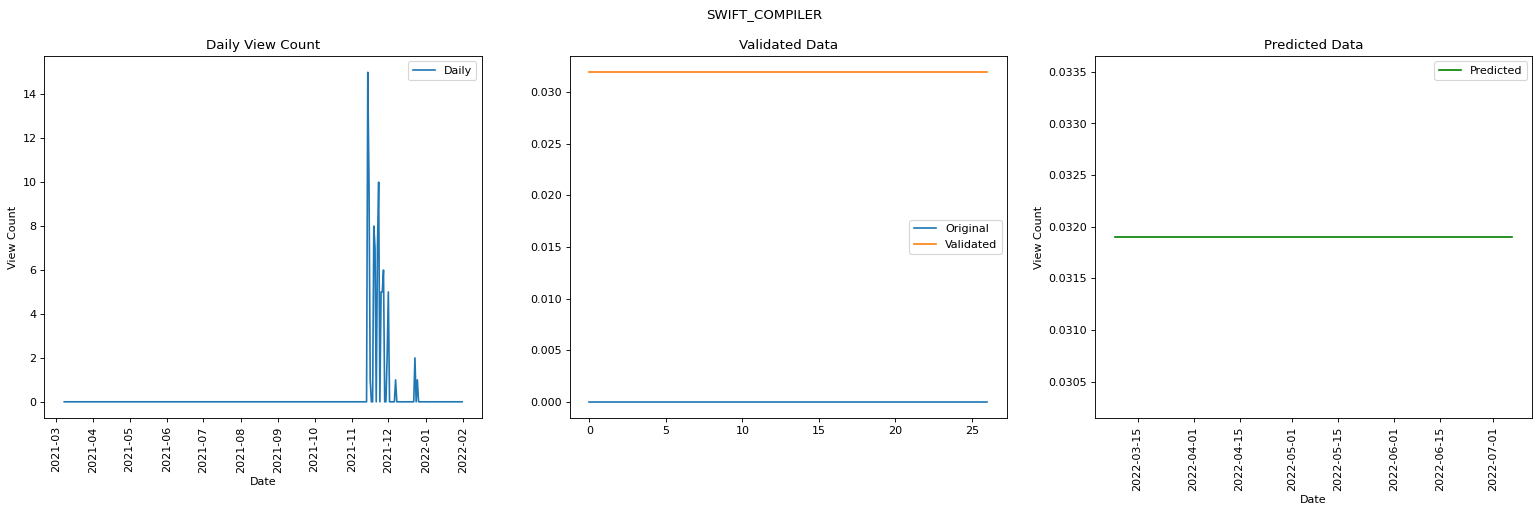

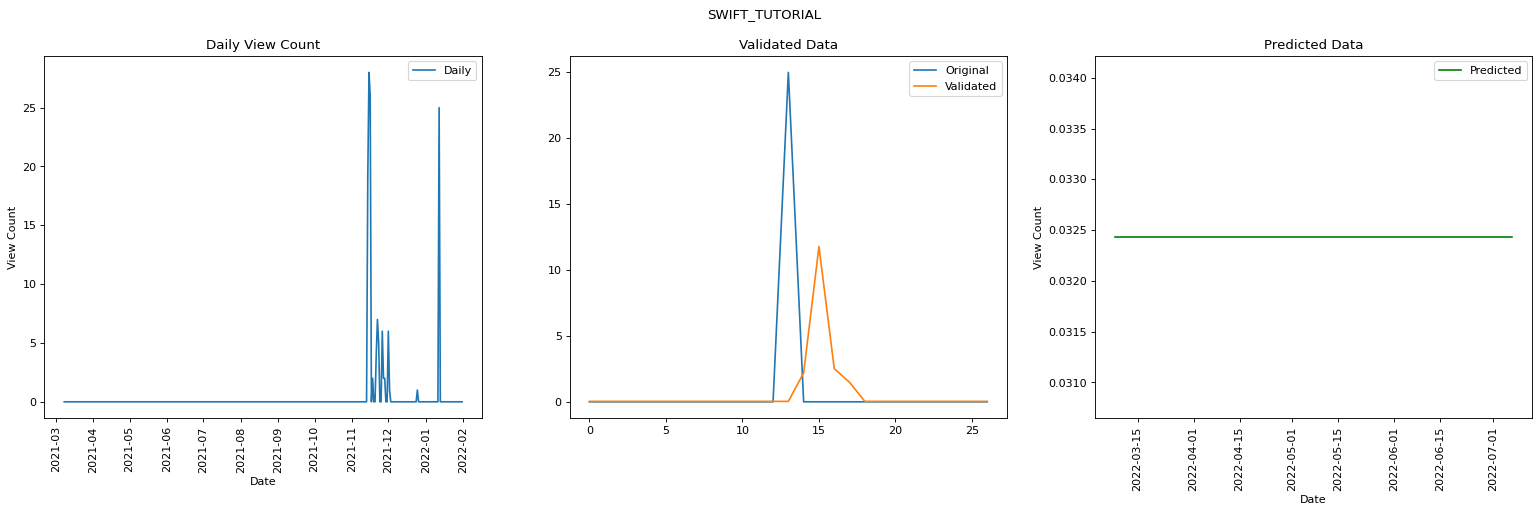

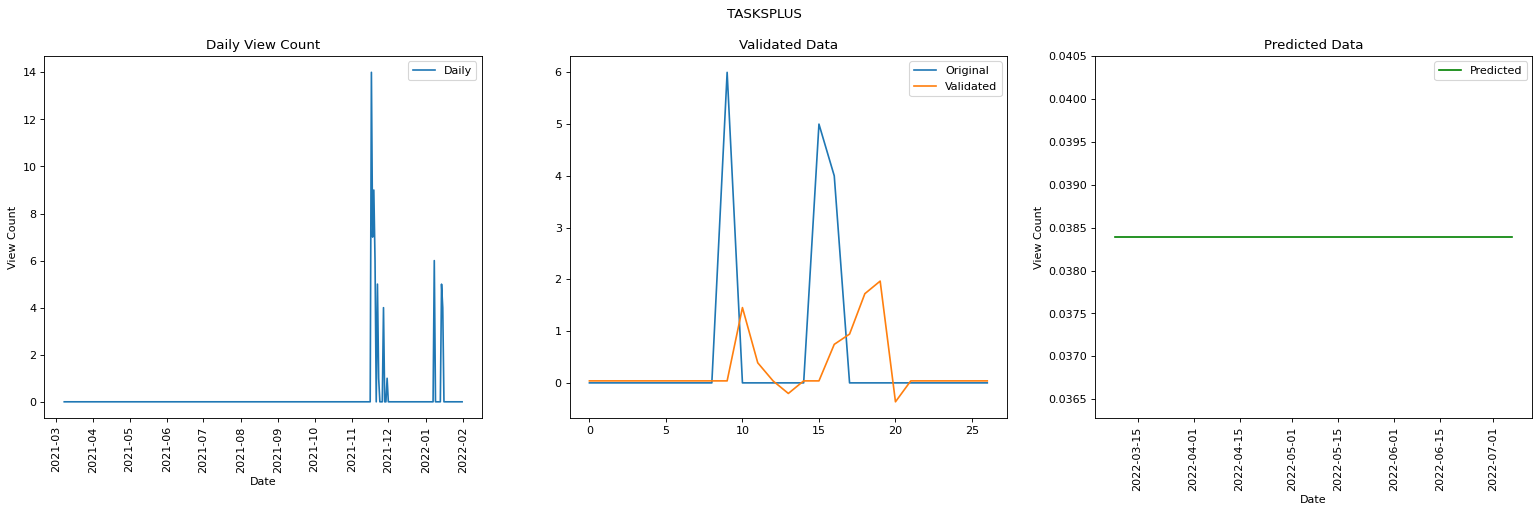

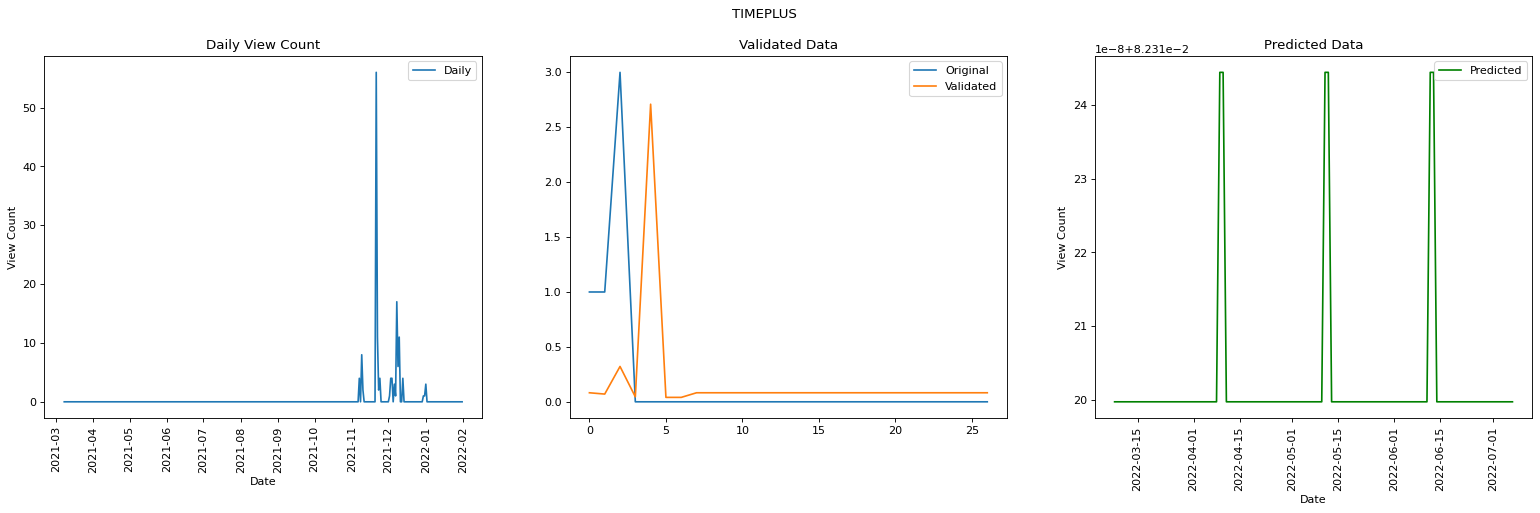

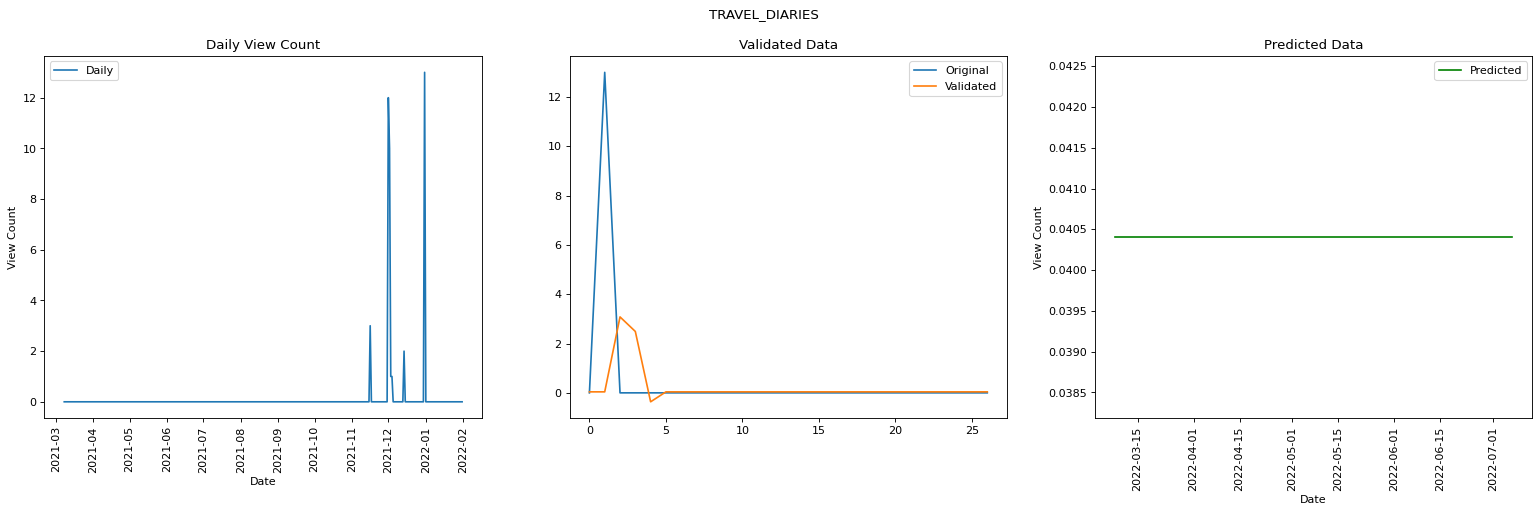

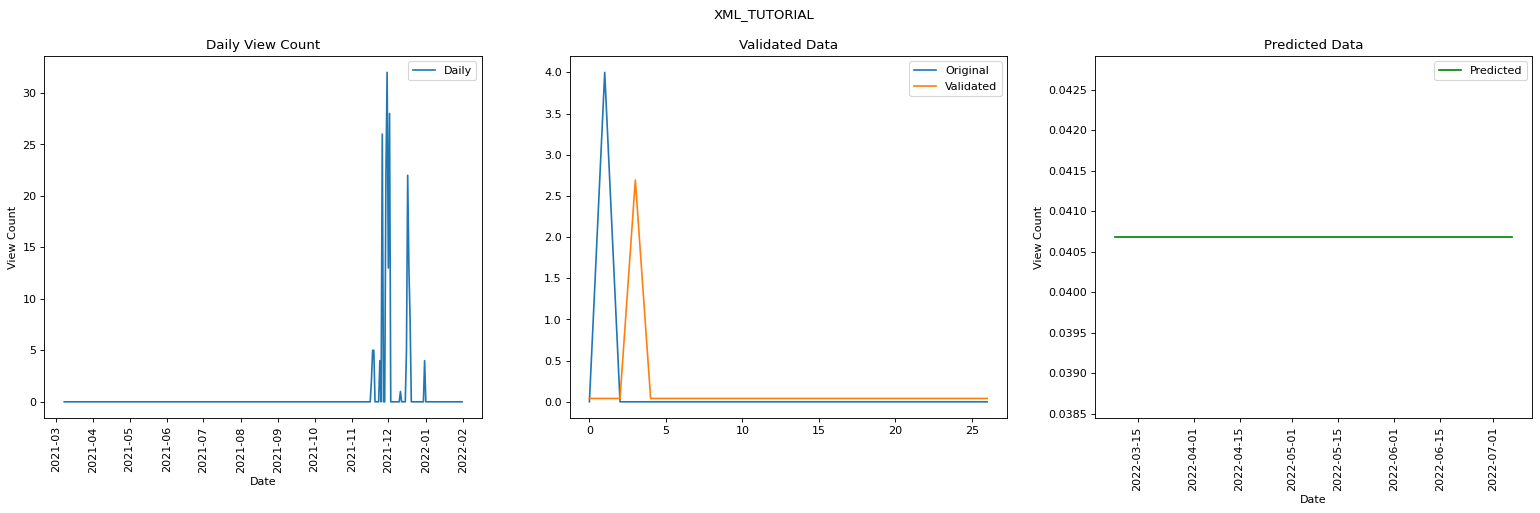

In [18]:
pred = []
plat = []
final_predictions = pd.DataFrame({'DATE': predicted_result['DATE']}) 

for platform in df.columns[1:]:
    data=pd.DataFrame({'DATE': df['DATE'], '{}'.format(platform): df['{}'.format(platform)]})
    data.index = data['DATE']
    data = data.drop(['DATE'], axis=1)
    future_data=pd.DataFrame({'DATE': future_df['DATE'], '{}'.format(platform): future_df['{}'.format(platform)]})
    future_data.index = future_data['DATE']
    future_data = future_data.drop(['DATE'], axis=1)
    future_data = future_data.head(120)


    def df_to_X_y(df, window_size=4):
      df_as_np = df.to_numpy()
      X = []
      y = []
      for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
      return np.array(X), np.array(y)

    WINDOW_SIZE = 4
    X, y = df_to_X_y(data, WINDOW_SIZE)
    X_train, y_train = X[:289], y[:289]
    X_test, y_test = X[289:], y[289:]
    X_predict, y_predict = X[:120], y[:120]

    cp = ModelCheckpoint('model/', save_best_only=True)
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[cp], verbose=0)
    model = load_model('model/', custom_objects={ 'loss': MeanSquaredError()})

    validations = model.predict(X_test).flatten()
    predictions = model.predict(X_predict).flatten()
    validated_result = pd.DataFrame({'Validated': validations, 'Original': y_test.flatten()})
    predicted_result = pd.DataFrame({'Predicted': predictions, 'DATE': future_data.index[:120]})

    plat.append(platform)
    pred.append(predicted_result['Predicted'])

    plt.rcParams.update({'figure.figsize': (24, 6), 'figure.dpi':80})
    plt.suptitle(platform)
    plt.subplot(1, 3, 1)
    plt.plot(data.index, data[data.columns[0]], label='Daily')
    plt.legend()
    plt.title('Daily View Count')
    plt.xlabel('Date')
    plt.ylabel('View Count')
    plt.xticks(rotation=90)

    plt.subplot(1, 3, 2)
    plt.plot(validated_result.index, validated_result['Original'], label='Original')
    plt.plot(validated_result.index, validated_result['Validated'], label='Validated')
    plt.legend()
    plt.title('Validated Data')

    plt.subplot(1, 3, 3)
    plt.plot(predicted_result['DATE'], predicted_result['Predicted'], color='Green', label='Predicted')
    plt.legend()
    plt.title('Predicted Data')
    plt.xlabel('Date')
    plt.ylabel('View Count')
    plt.xticks(rotation=90)

    plt.show()

In [19]:
for i in range(36):
  final_predictions.insert(i+1, plat[i], pred[i])
final_predictions.head()

,DATE,C_COMPILER,C_TUTORIAL,CSHARP_COMPILER,CSHARP_TUTORIAL,CPLUSPLUS_COMPILER,CPLUSPLUS_TUTORIAL,CALCULATORPLUS,CALENDARPLUS,COMPILERPLUS,CSS_TUTORIAL,DART_COMPILER,DART_TUTORIAL,GO_COMPILER,GO_TUTORIAL,HTML_TUTORIAL,JAVA_COMPILER,JAVA_TUTORIAL,JAVASCRIPT_COMPILER,JAVASCRIPT_TUTORIAL,KOTLIN_COMPILER,KOTLIN_TUTORIAL,MOTIVATIONPLUS,NOTESPLUS,PHP_COMPILER,PHP_TUTORIAL,PYTHON_COMPILER,PYTHON_TUTORIAL,RUBY_COMPILER,RUBY_TUTORIAL,SUCCESS_STORIES,SWIFT_COMPILER,SWIFT_TUTORIAL,TASKSPLUS,TIMEPLUS,TRAVEL_DIARIES,XML_TUTORIAL
0,2022-03-08,0.034388,-0.019716,0.042584,0.044048,0.119968,0.071541,0.062531,0.029853,0.09293,0.073199,0.027242,0.000177,0.096331,0.078921,0.092179,0.076588,0.133455,0.023897,0.026969,0.000002,-0.000006,0.191864,0.249572,0.016928,0.028772,0.02957,0.029957,0.030994,0.031515,0.031378,0.0319,0.032431,0.03839,0.08231,0.040405,0.040682
1,2022-03-09,0.034388,-0.019716,0.042584,0.044048,0.119968,0.071541,0.062531,0.029853,0.09293,0.073199,0.027242,0.000177,0.096331,0.078921,0.092179,0.076588,0.133455,0.023897,0.026969,0.000002,-0.000006,0.191864,0.249572,0.016928,0.028772,0.02957,0.029957,0.030994,0.031515,0.031378,0.0319,0.032431,0.03839,0.08231,0.040405,0.040682
2,2022-03-10,0.034388,-0.019716,0.042584,0.044048,0.119968,0.071541,0.062531,0.029853,0.09293,0.073199,0.027242,0.000177,0.096331,0.078921,0.092179,0.076588,0.133455,0.023897,0.026969,0.000002,-0.000006,0.191864,0.249572,0.016928,0.028772,0.02957,0.029957,0.030994,0.031515,0.031378,0.0319,0.032431,0.03839,0.08231,0.040405,0.040682
3,2022-03-11,0.034388,-0.019716,0.042584,0.044048,0.119968,0.071541,0.062531,0.029853,0.09293,0.073199,0.027242,0.000177,0.096331,0.078921,0.092179,0.076588,0.133455,0.023897,0.026969,0.000002,-0.000006,0.191864,0.249572,0.016928,0.028772,0.02957,0.029957,0.030994,0.031515,0.031378,0.0319,0.032431,0.03839,0.08231,0.040405,0.040682
4,2022-03-13,0.034388,-0.019716,0.042584,0.044048,0.119968,0.071541,0.062531,0.029853,0.09293,0.073199,0.027242,0.000177,0.096331,0.078921,0.092179,0.076588,0.133455,0.023897,0.026969,0.000002,-0.000006,0.191864,0.249572,0.016928,0.028772,0.02957,0.029957,0.030994,0.031515,0.031378,0.0319,0.032431,0.03839,0.08231,0.040405,0.040682
